In [1]:
ds = "c100"
k = 0
take_abs = True
take_covavg = False

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from utils.constant import ViTExperiment
from utils.vit_util import identfy_tgt_misclf

2025-04-23 19:00:59.199892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-23 19:00:59.277894: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-23 19:00:59.697516: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-04-23 19:00:59.697581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

# 間違い種類ごとに対応するVmisとVcorの差をプロット

In [3]:
def load_vcor_vmis(vcor_dir, vmis_dir, misclf_type, end_li=12, abs=True, covavg=False, split="repair", misclf_pair=None, tgt_label=None, tgt_layer=-1):
    prefix = ("vscore_abs" if abs else "vscore") + ("_covavg" if covavg else "")
    
    # misclf_typeに対応するvmisのロード
    if misclf_type == "src_tgt":
        vmis_file_name = f"{prefix}_l1tol{end_li}_{misclf_pair[0]}to{misclf_pair[1]}_ori_{split}_mis.npy"
    elif misclf_type == "tgt":
        vmis_file_name = f"{prefix}_l1tol{end_li}_{tgt_label}_ori_{split}_mis.npy"
    elif misclf_type == "tgt_fp":
        vmis_file_name = f"{prefix}_l1tol{end_li}_{tgt_label}_ori_{split}_fp_mis.npy"
    elif misclf_type == "tgt_fn":
        vmis_file_name = f"{prefix}_l1tol{end_li}_{tgt_label}_ori_{split}_fn_mis.npy"
    else:
        raise ValueError(f"Unknown misclassification type: {misclf_type}")
    vmis_path = os.path.join(vmis_dir, vmis_file_name)
    vmis = np.load(vmis_path)
    
    # misclf_typeに対応するvcorのロード
    if misclf_type == "src_tgt":
        reference_label = misclf_pair[0]
    else:
        reference_label = tgt_label
    vcor_file_name = f"{prefix}_l1tol{end_li}_label_{reference_label}_ori_{split}_cor.npy"
    vcor_path = os.path.join(vcor_dir, vcor_file_name)
    vcor = np.load(vcor_path)
    
    return vcor[tgt_layer], vmis[tgt_layer]

def plot_vcor_vmis(vscore_cor, vscore_mis, title_suffix="", scaling=False):
    assert vscore_cor.shape == vscore_mis.shape, "Shape mismatch between cor and mis vscores"
    
    x = np.arange(len(vscore_cor))
    
    plt.figure(figsize=(12, 4))
    # plt.plot(x, vscore_cor, label="Vscore (cor)", color="tab:blue", alpha=0.5)
    # plt.plot(x, vscore_mis, label="Vscore (mis)", color="tab:orange", alpha=0.5)
    # plt.plot(x, vscore_cor - vscore_mis, label="Vcor - Vmis", color="tab:red", alpha=0.5)
    # plt.scatter(x, np.abs(vscore_cor - vscore_mis), label="Vcor - Vmis", color="tab:red", alpha=0.5)
    vdiff = vscore_cor - vscore_mis
    if scaling:
        # vdiff に対して min-max scaling
        vdiff_min = np.min(vdiff)
        vdiff_max = np.max(vdiff)
        vdiff = (vdiff - vdiff_min) / (vdiff_max - vdiff_min)
    plt.scatter(x, vdiff, label="Vcor - Vmis", color="tab:red", alpha=0.5)

    plt.title(f"Vscore {title_suffix}", fontsize=14)

    plt.xlabel("Neuron Index", fontsize=12)
    plt.ylabel("Vscore Value", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

misclf_type: src_tgt, tgt_rank: 1, vdiff_min: -13.730102751239528, vdiff_max: 92.73665229645493


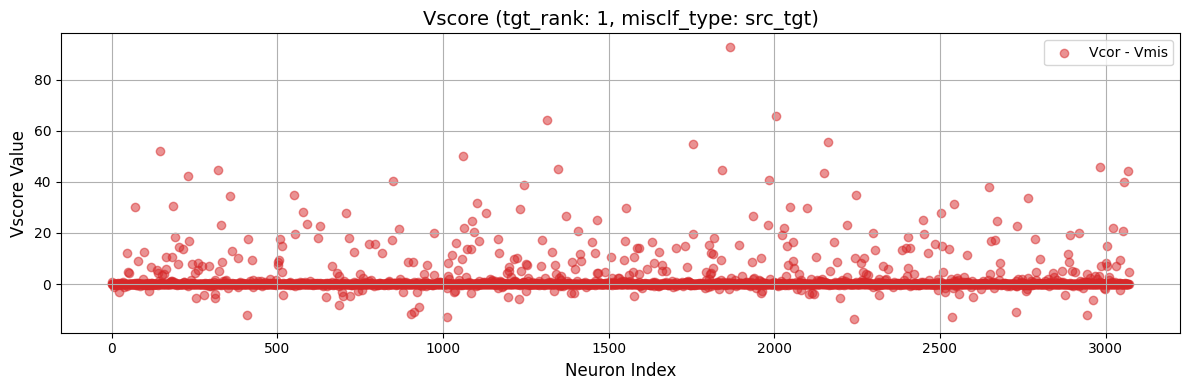

misclf_type: tgt, tgt_rank: 1, vdiff_min: -240.62506979000207, vdiff_max: 123.48125430846994


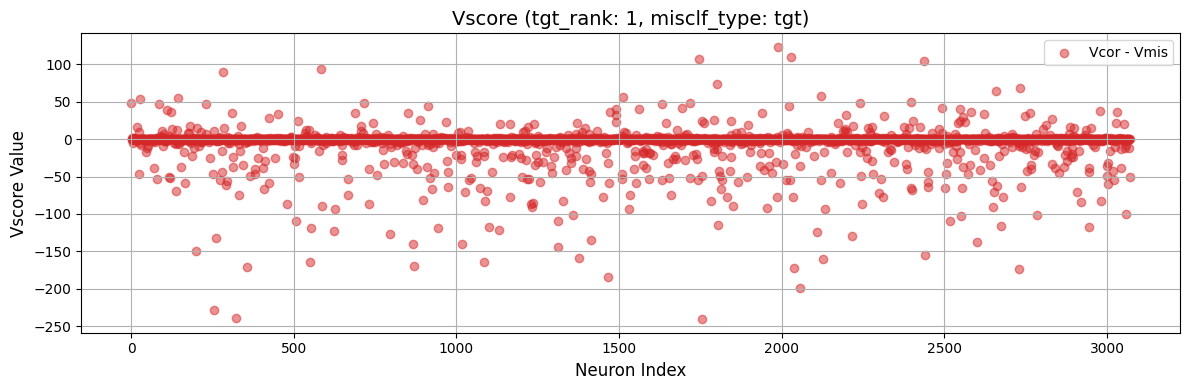

misclf_type: tgt_fp, tgt_rank: 1, vdiff_min: -166.6437770670201, vdiff_max: 138.4219907160028


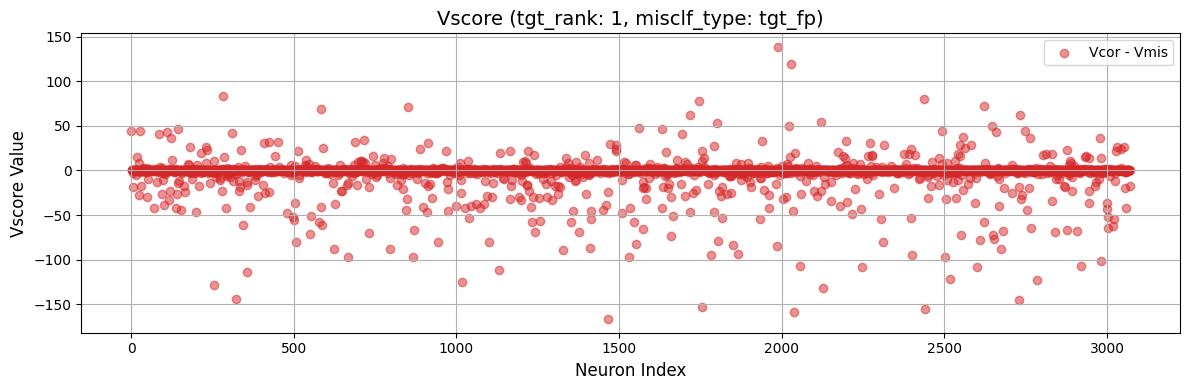

misclf_type: tgt_fn, tgt_rank: 1, vdiff_min: -347.2816695208505, vdiff_max: 251.49595709910938


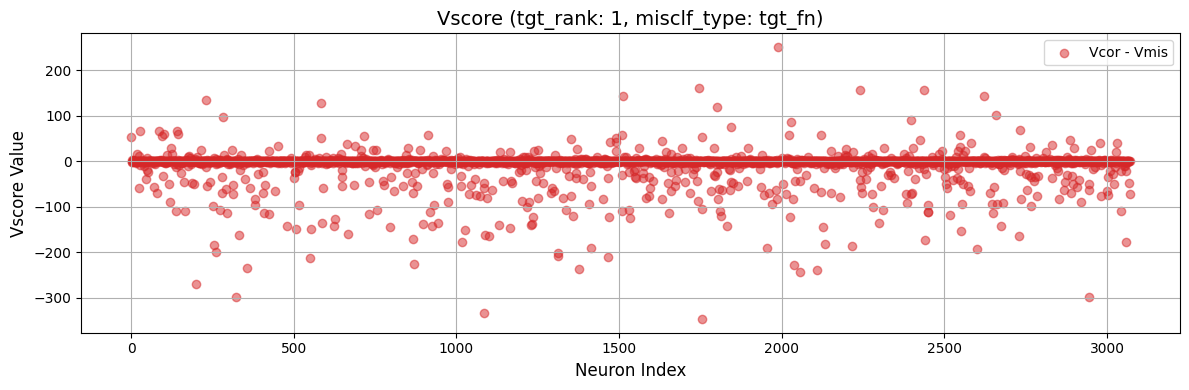

misclf_type: src_tgt, tgt_rank: 2, vdiff_min: -76.23454630035928, vdiff_max: 86.50910358899964


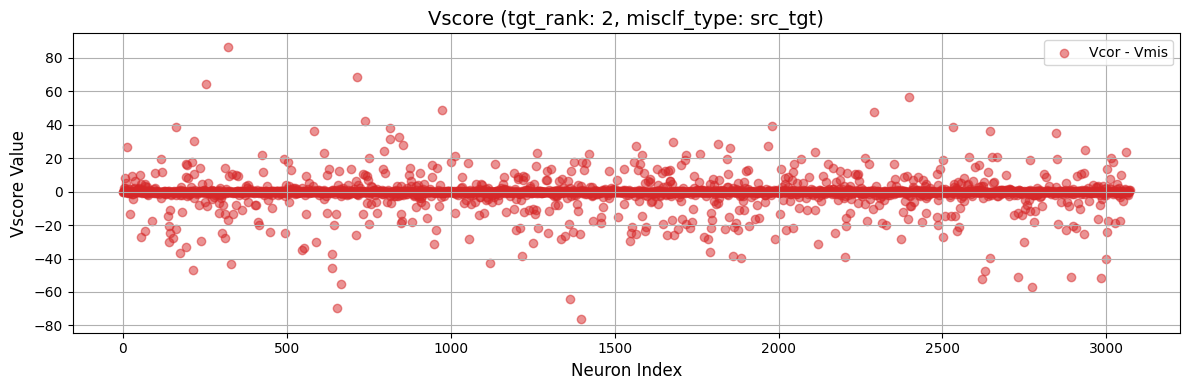

misclf_type: tgt, tgt_rank: 2, vdiff_min: -478.84791346369525, vdiff_max: 70.89477509652092


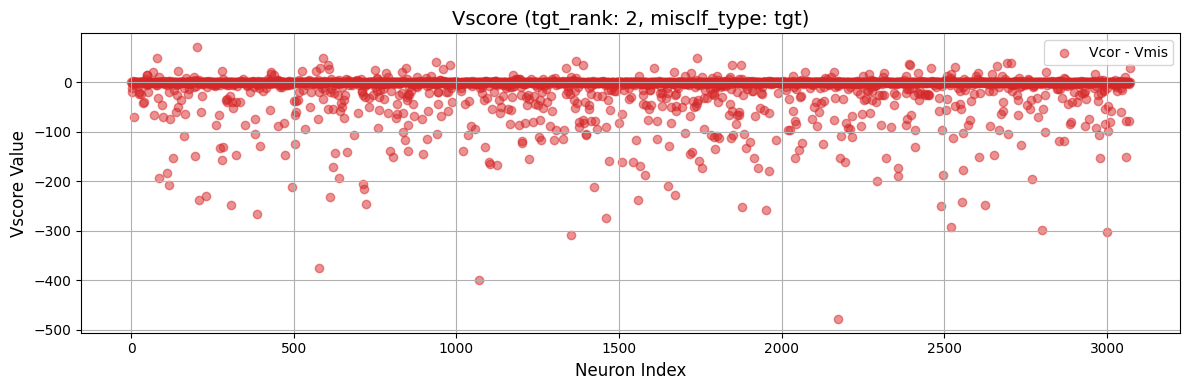

misclf_type: tgt_fp, tgt_rank: 2, vdiff_min: -162.9554788961106, vdiff_max: 70.82781324770426


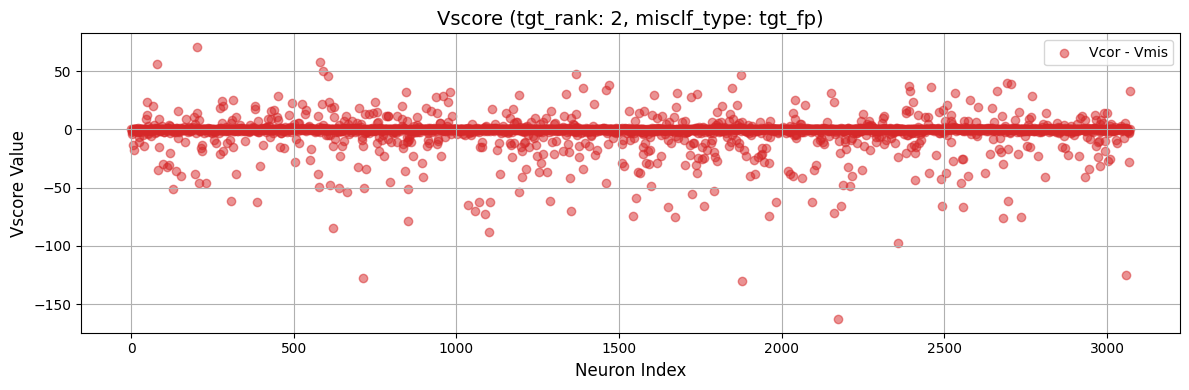

misclf_type: tgt_fn, tgt_rank: 2, vdiff_min: -837.8029995654796, vdiff_max: 70.00511361401132


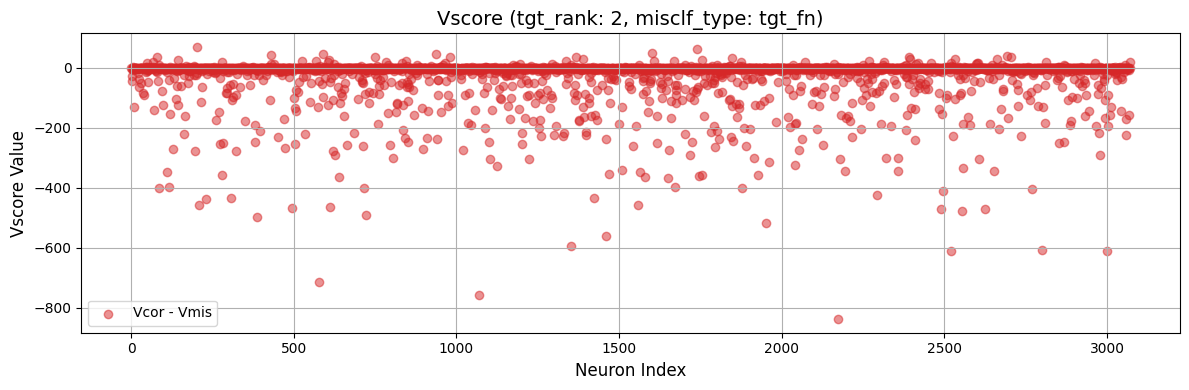

misclf_type: src_tgt, tgt_rank: 3, vdiff_min: -240.4732607164426, vdiff_max: 68.35932096859416


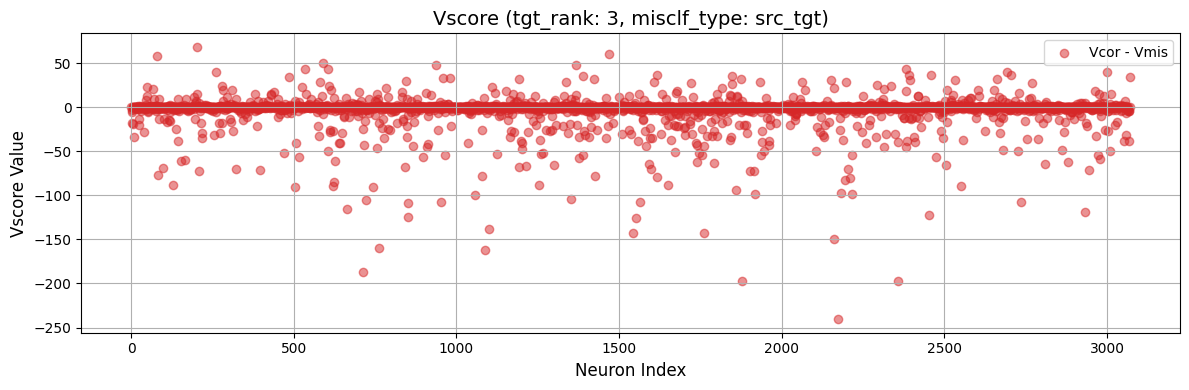

misclf_type: tgt, tgt_rank: 3, vdiff_min: -510.08852892413415, vdiff_max: 66.51458090683595


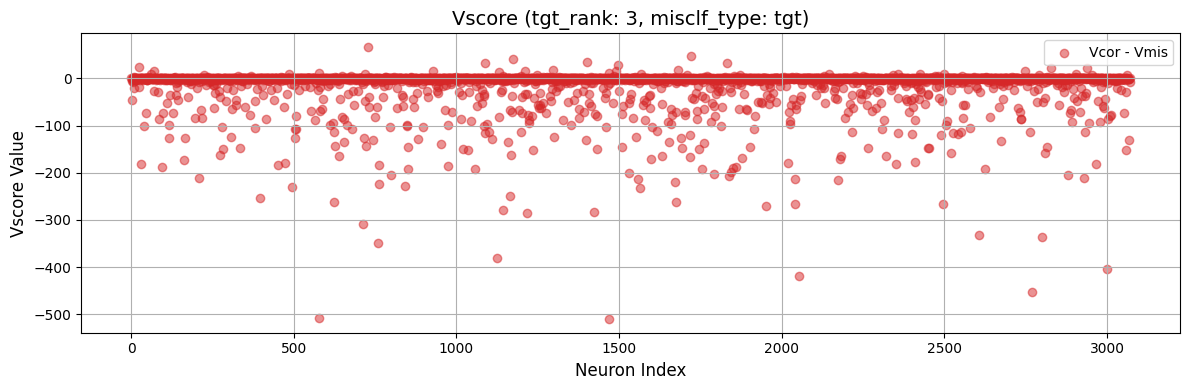

misclf_type: tgt_fp, tgt_rank: 3, vdiff_min: -70.49852016240925, vdiff_max: 19.97274714732867


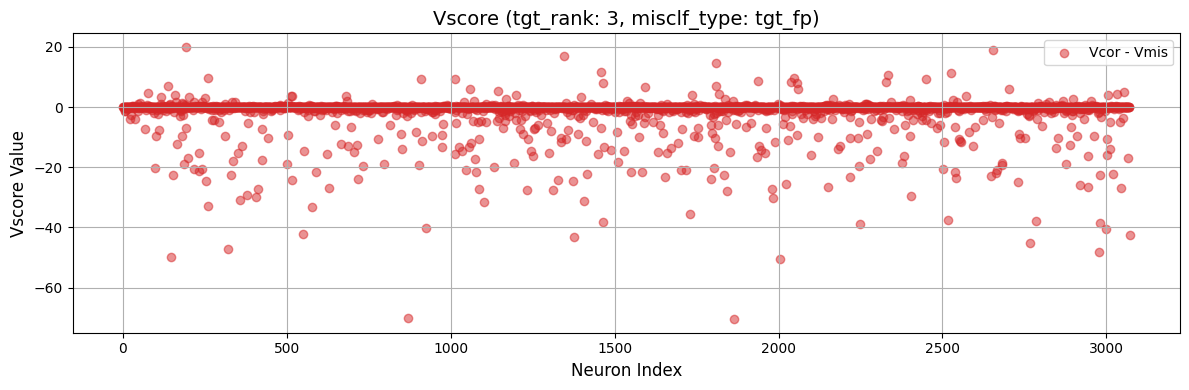

misclf_type: tgt_fn, tgt_rank: 3, vdiff_min: -969.161710344532, vdiff_max: 71.21534558829711


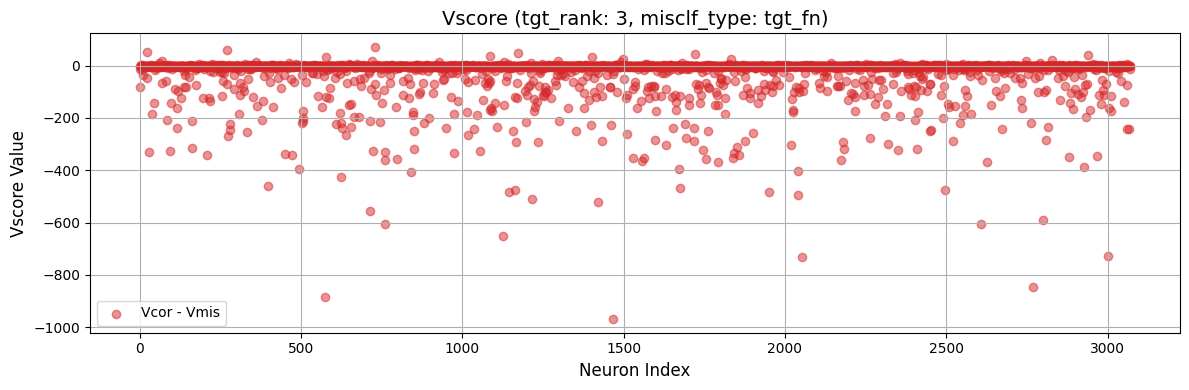

misclf_type: src_tgt, tgt_rank: 4, vdiff_min: -119.04541282647826, vdiff_max: 86.22988281108509


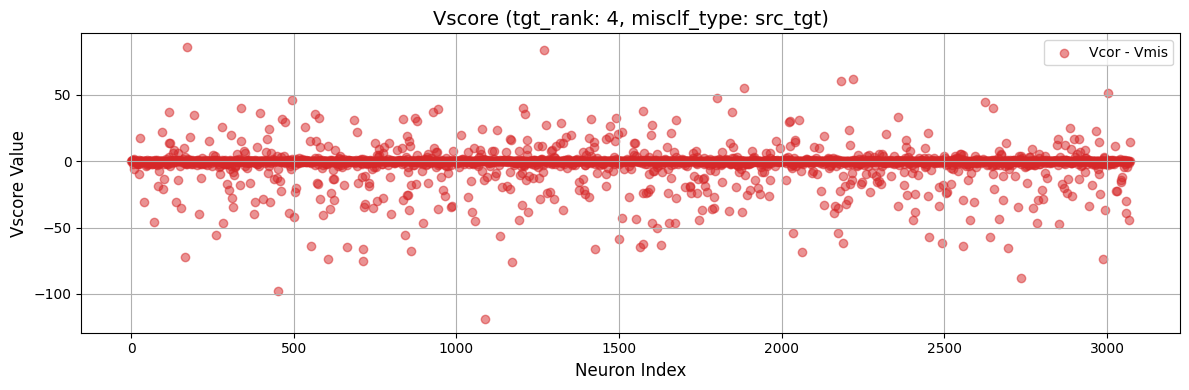

misclf_type: tgt, tgt_rank: 4, vdiff_min: -714.6070726604687, vdiff_max: 78.78038529229374


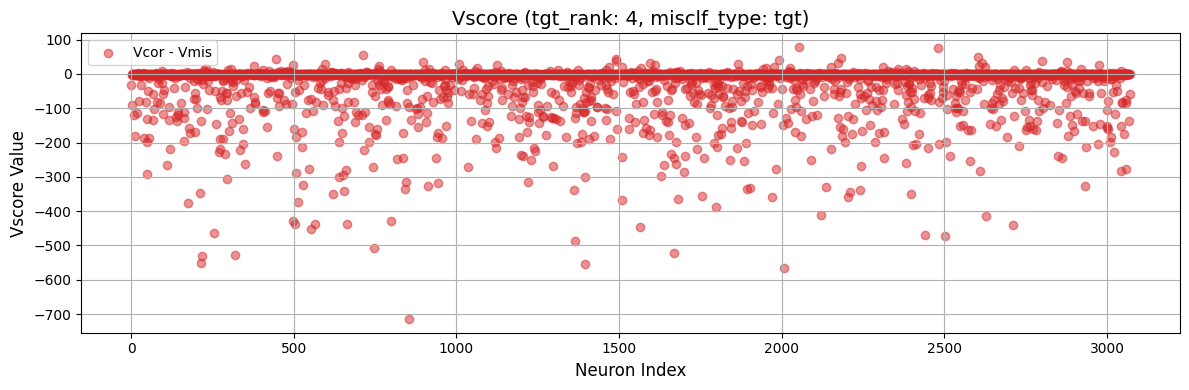

misclf_type: tgt_fp, tgt_rank: 4, vdiff_min: -524.7413319690935, vdiff_max: 140.06158662342233


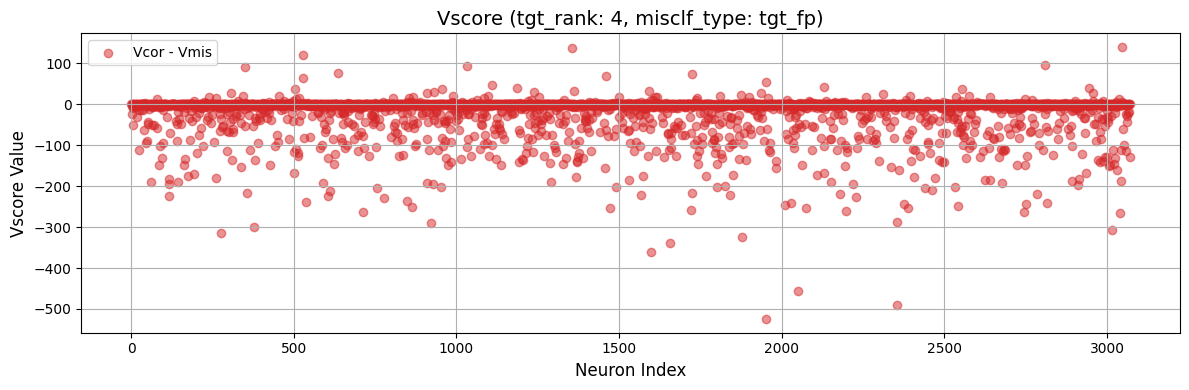

misclf_type: tgt_fn, tgt_rank: 4, vdiff_min: -970.7202677143584, vdiff_max: 133.11516745389866


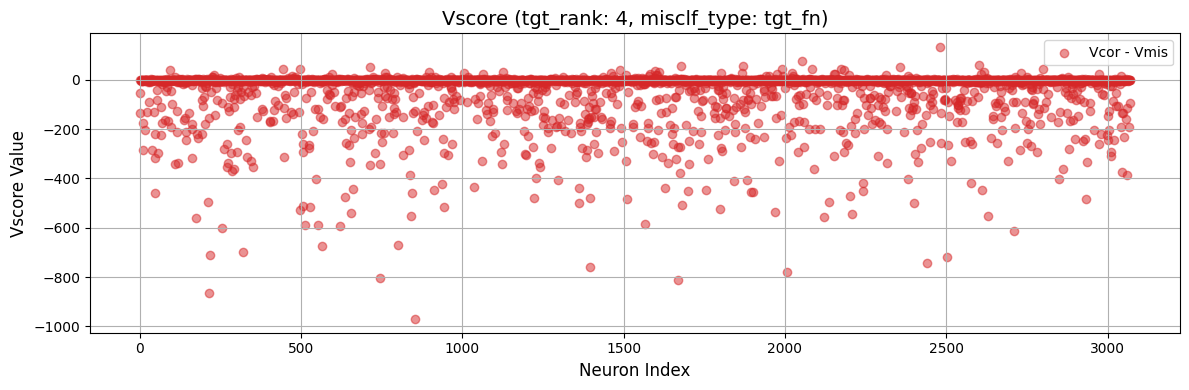

misclf_type: src_tgt, tgt_rank: 5, vdiff_min: -204.62890734244957, vdiff_max: 86.59443414543661


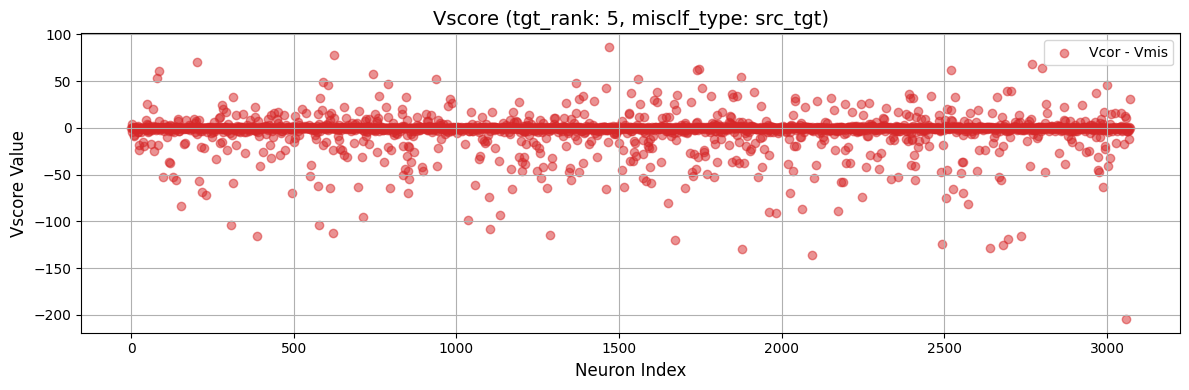

misclf_type: tgt, tgt_rank: 5, vdiff_min: -522.8150223197069, vdiff_max: 189.02397718583944


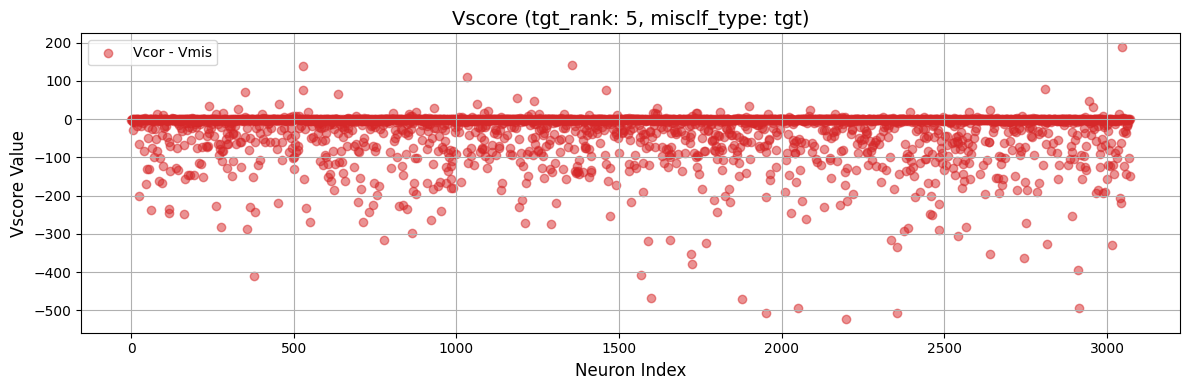

misclf_type: tgt_fp, tgt_rank: 5, vdiff_min: -68.56626317864648, vdiff_max: 64.89433270382573


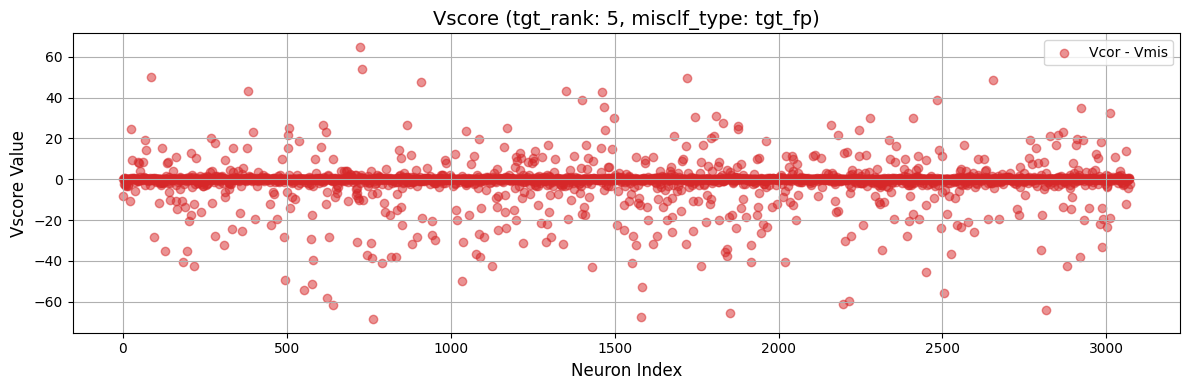

misclf_type: tgt_fn, tgt_rank: 5, vdiff_min: -922.396539066051, vdiff_max: 403.3202240809829


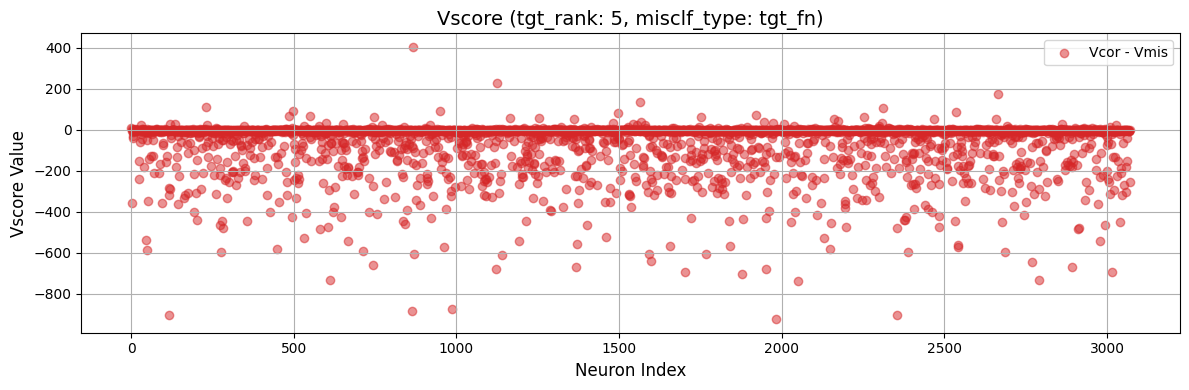

In [11]:
# tgt_ranks = [1]
tgt_ranks = [1, 2, 3, 4, 5]
misclf_types = ["src_tgt", "tgt", "tgt_fp", "tgt_fn"]

vcor_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "vscores")
misclf_info_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "misclf_info")

for i, tgt_rank in enumerate(tgt_ranks):
    for j, misclf_type in enumerate(misclf_types):
        if misclf_type == "tgt_fp" or misclf_type == "tgt_fn":
            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(misclf_info_dir, tgt_split="repair", misclf_type="tgt", tgt_rank=tgt_rank, fpfn=misclf_type.split("_")[1])
        else:
            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(misclf_info_dir, tgt_split="repair", misclf_type=misclf_type, tgt_rank=tgt_rank)
        # tgt_rankとmisclf_typeに応じたVmisを取得
        vmis_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), f"misclf_top{tgt_rank}", "vscores")
        vcor, vmis = load_vcor_vmis(vcor_dir, vmis_dir, misclf_type, abs=take_abs, covavg=take_covavg, misclf_pair=misclf_pair, tgt_label=tgt_label)
        # summaryを表示
        vdiff = vcor - vmis
        vdiff_min = np.min(vdiff)
        vdiff_max = np.max(vdiff)
        print(f"=============================================\nmisclf_type: {misclf_type}, tgt_rank: {tgt_rank}, vdiff_min: {vdiff_min}, vdiff_max: {vdiff_max}\n============================================")
        # plot
        plot_vcor_vmis(vcor, vmis, title_suffix=f"(tgt_rank: {tgt_rank}, misclf_type: {misclf_type})", scaling=False)


# 間違い種類ごとに対応するVcor/Vmisをt-SNEする

1-5ではラベルごとだったが今回は間違い種類ごと．

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

def plot_tsne_cor_mis_vscores(cor_dict, mis_dict, cor_all_vscore=None, perplexity=30, random_state=42):
    all_vecs, all_keys, all_types = [], [], []

    # cor
    for key, vec in cor_dict.items():
        all_vecs.append(vec)
        all_keys.append(key)
        all_types.append("cor")

    # mis
    for key, vec in mis_dict.items():
        all_vecs.append(vec)
        all_keys.append(key)
        all_types.append("mis")

    # cor_all 追加
    if cor_all_vscore is not None:
        for vec in cor_all_vscore:
            all_vecs.append(vec)
            all_keys.append("cor_all")
            all_types.append("cor_all")

    all_vecs = np.array(all_vecs)

    print(f"Running t-SNE on {len(all_vecs)} vectors")
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    embedded = tsne.fit_transform(all_vecs)

    # DataFrameに変換
    df = pd.DataFrame(embedded, columns=["x", "y"])
    df["key"] = all_keys
    df["cor_mis"] = all_types

    # 描画
    plt.figure(figsize=(10, 8))
    palette = {"cor": "tab:blue", "mis": "tab:orange", "cor_all": "red"}
    markers = {"cor": "o", "mis": "s", "cor_all": "*"}

    sns.scatterplot(
        data=df, x="x", y="y",
        hue="cor_mis",
        style="cor_mis",
        palette=palette,
        markers=markers,
        s=df["cor_mis"].map(lambda x: 300 if x == "cor_all" else 80),
        alpha=0.85
    )

    # cor/mis の共通 key を線で結ぶ
    common_keys = set(cor_dict.keys()) & set(mis_dict.keys())
    for key in common_keys:
        cor_idx = df[(df["key"] == key) & (df["cor_mis"] == "cor")].index
        mis_idx = df[(df["key"] == key) & (df["cor_mis"] == "mis")].index
        if not cor_idx.empty and not mis_idx.empty:
            x_vals = [df.loc[cor_idx[0], "x"], df.loc[mis_idx[0], "x"]]
            y_vals = [df.loc[cor_idx[0], "y"], df.loc[mis_idx[0], "y"]]
            plt.plot(x_vals, y_vals, color="gray", linewidth=0.5, alpha=0.5)

    plt.title("t-SNE of VScore (Layer 12) — cor/mis with shift lines", fontsize=14)
    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")
    plt.legend(title="cor/mis type", loc="best")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return df

(1, 3072)
Running t-SNE on 41 vectors


/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


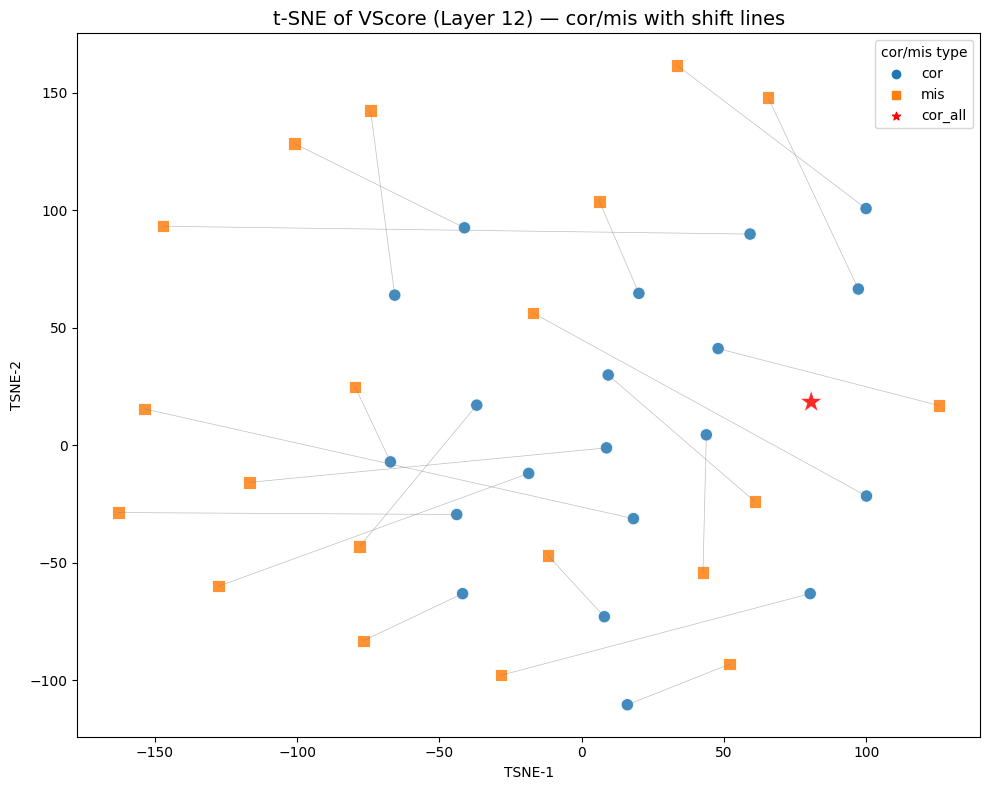

In [6]:
# tgt_ranks = [1]
tgt_ranks = [1, 2, 3, 4, 5]
misclf_types = ["src_tgt", "tgt", "tgt_fp", "tgt_fn"]

vcor_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "vscores")
misclf_info_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "misclf_info")

cor_dict = {}
mis_dict = {}

# 全ラベルに対するvscore_corも追加
cor_all_vscore_path = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "vscores", "vscore_l1tol12_all_label_ori_repair_cor.npy")
cor_all_vscore = np.load(cor_all_vscore_path)[-1]
cor_all_vscore = cor_all_vscore.reshape(-1, len(cor_all_vscore))
print(cor_all_vscore.shape)

for i, tgt_rank in enumerate(tgt_ranks):
    for j, misclf_type in enumerate(misclf_types):
        if misclf_type == "tgt_fp" or misclf_type == "tgt_fn":
            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(misclf_info_dir, tgt_split="repair", misclf_type="tgt", tgt_rank=tgt_rank, fpfn=misclf_type.split("_")[1])
        else:
            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(misclf_info_dir, tgt_split="repair", misclf_type=misclf_type, tgt_rank=tgt_rank)
        # tgt_rankとmisclf_typeに応じたVmisを取得
        vmis_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), f"misclf_top{tgt_rank}", "vscores")
        vcor, vmis = load_vcor_vmis(vcor_dir, vmis_dir, misclf_type, abs=take_abs, covavg=take_covavg, misclf_pair=misclf_pair, tgt_label=tgt_label)
        # vcorとvmisを辞書に格納
        cor_dict[(tgt_rank, misclf_type)] = vcor
        mis_dict[(tgt_rank, misclf_type)] = vmis
# tsneのプロット
df = plot_tsne_cor_mis_vscores(cor_dict, mis_dict, cor_all_vscore=cor_all_vscore)

# 間違いデータに対する中間ニューロン活性化関数値をプロット

misclf_type: src_tgt, tgt_rank: 1, mean_misact_min: -0.1581316888332367, mean_misact_max: 9.316559791564941


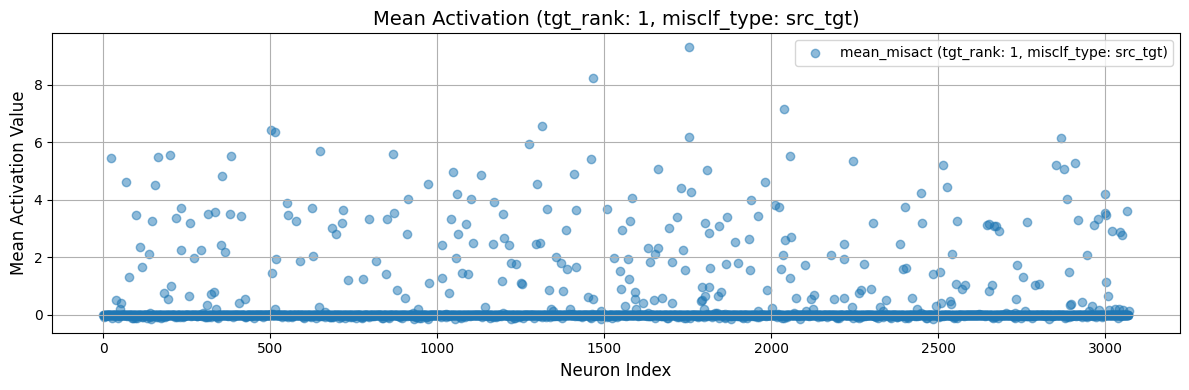

misclf_type: tgt, tgt_rank: 1, mean_misact_min: -0.11891873925924301, mean_misact_max: 7.2681732177734375


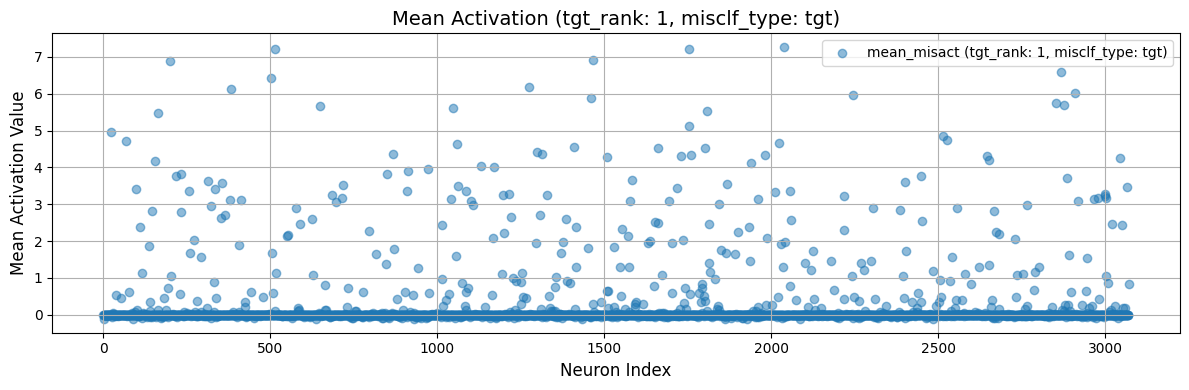

misclf_type: tgt_fp, tgt_rank: 1, mean_misact_min: -0.13449546694755554, mean_misact_max: 7.750295639038086


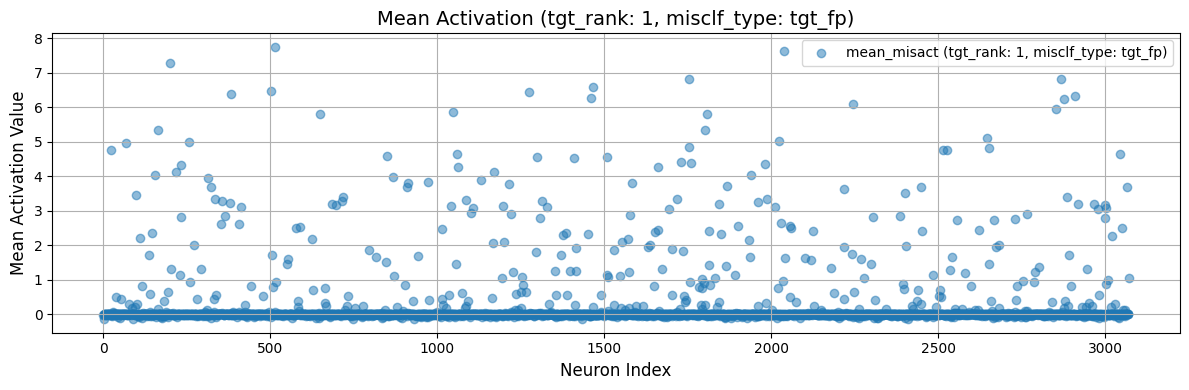

misclf_type: tgt_fn, tgt_rank: 1, mean_misact_min: -0.1327861249446869, mean_misact_max: 7.5677361488342285


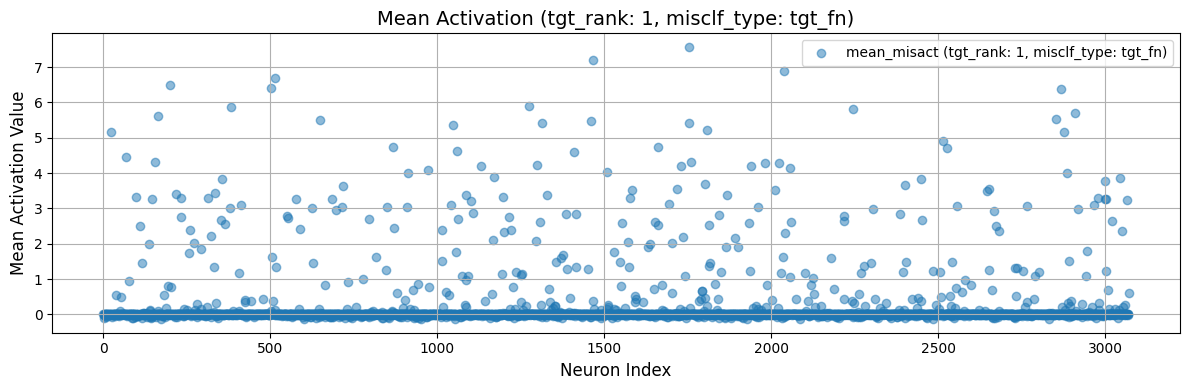

misclf_type: src_tgt, tgt_rank: 2, mean_misact_min: -0.13641174137592316, mean_misact_max: 8.203950881958008


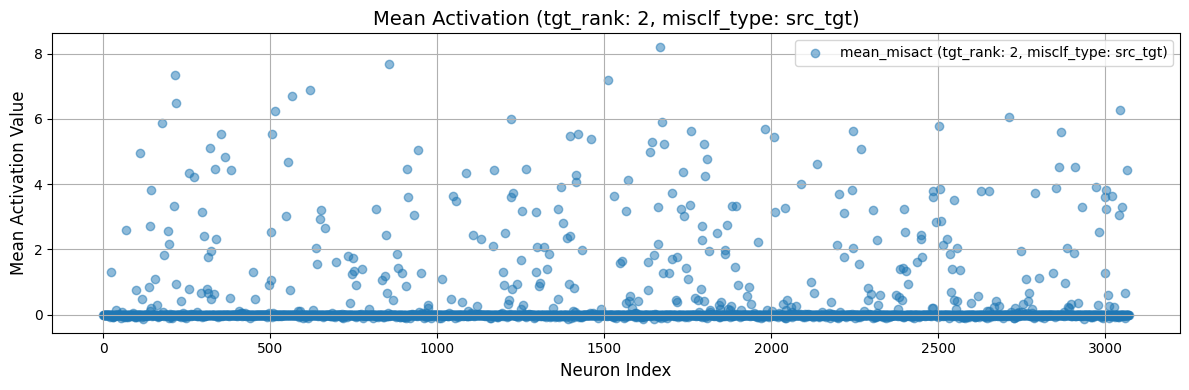

misclf_type: tgt, tgt_rank: 2, mean_misact_min: -0.10282778739929199, mean_misact_max: 6.752007961273193


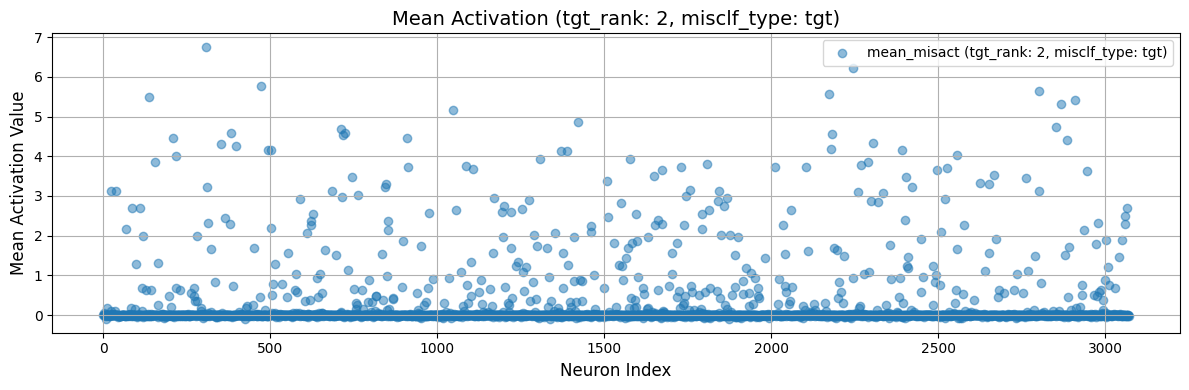

misclf_type: tgt_fp, tgt_rank: 2, mean_misact_min: -0.1320975124835968, mean_misact_max: 7.447002410888672


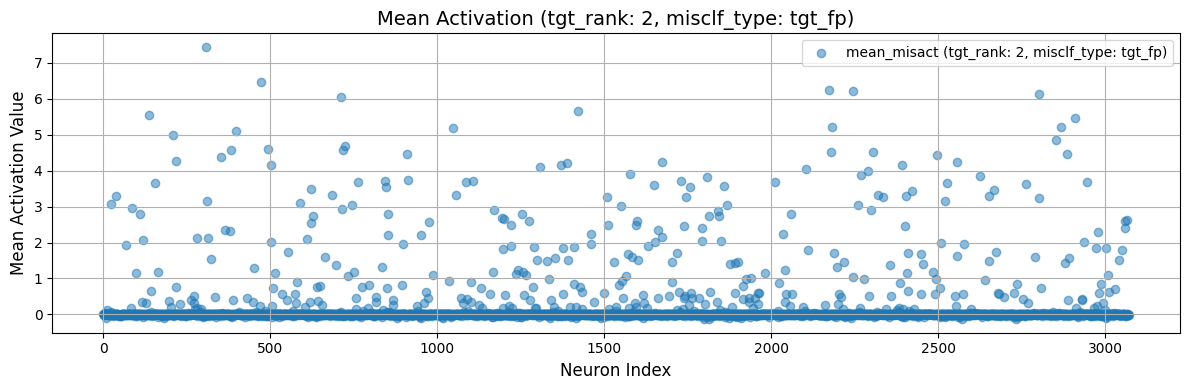

misclf_type: tgt_fn, tgt_rank: 2, mean_misact_min: -0.11659713089466095, mean_misact_max: 6.249899387359619


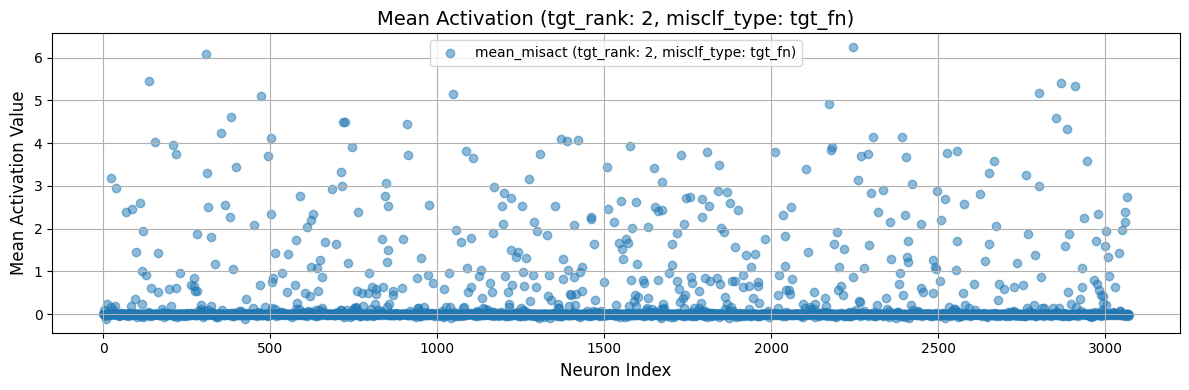

misclf_type: src_tgt, tgt_rank: 3, mean_misact_min: -0.14627432823181152, mean_misact_max: 8.223817825317383


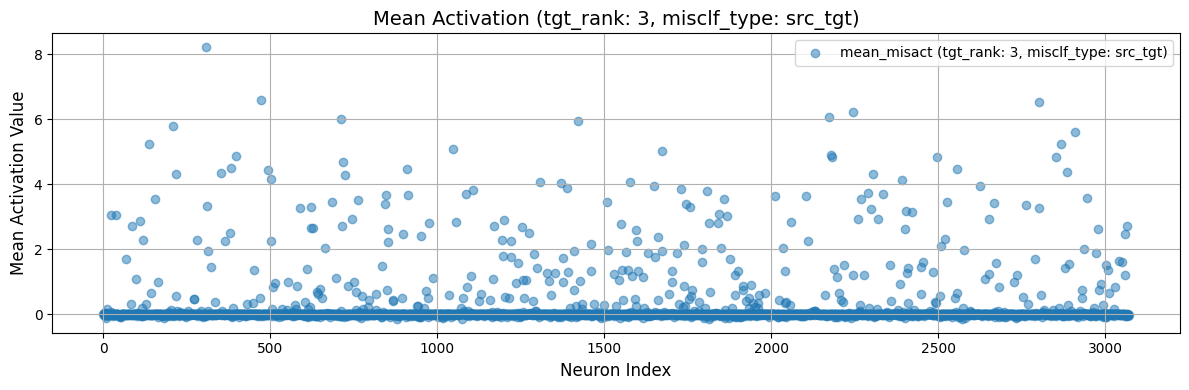

misclf_type: tgt, tgt_rank: 3, mean_misact_min: -0.13194771111011505, mean_misact_max: 8.07429027557373


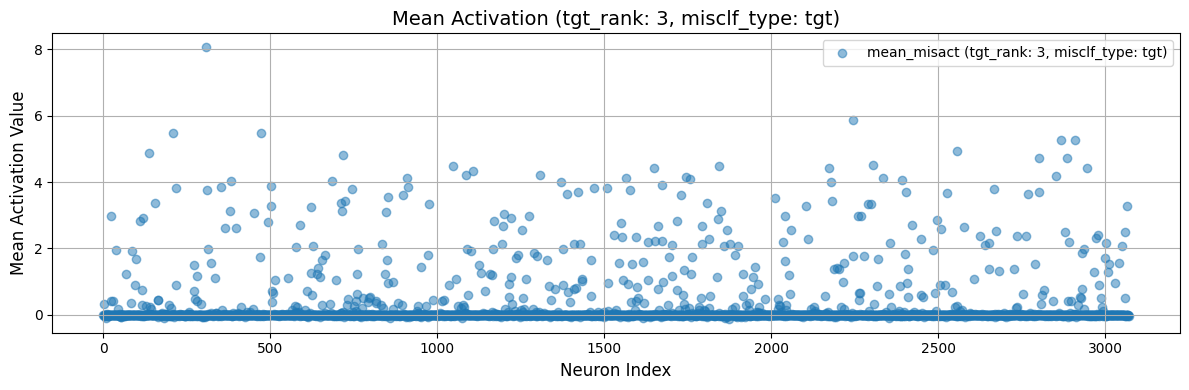

misclf_type: tgt_fp, tgt_rank: 3, mean_misact_min: -0.15070238709449768, mean_misact_max: 8.848832130432129


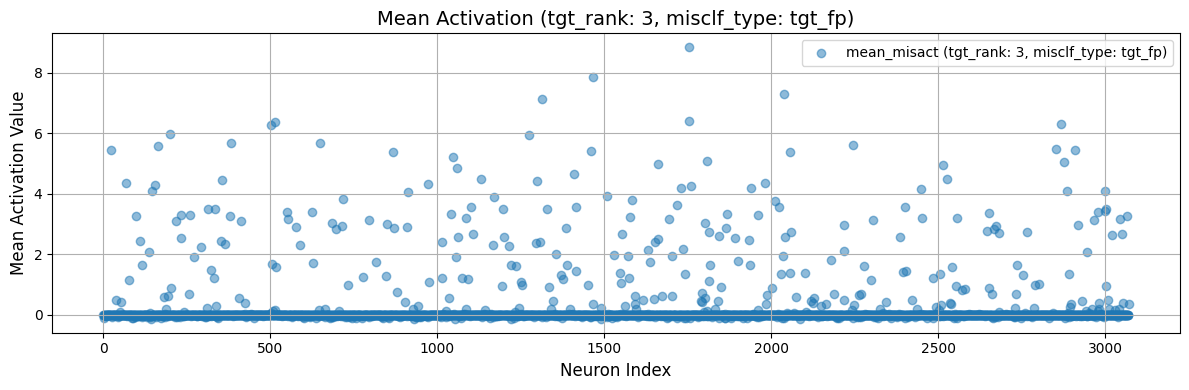

misclf_type: tgt_fn, tgt_rank: 3, mean_misact_min: -0.1211065724492073, mean_misact_max: 7.555563449859619


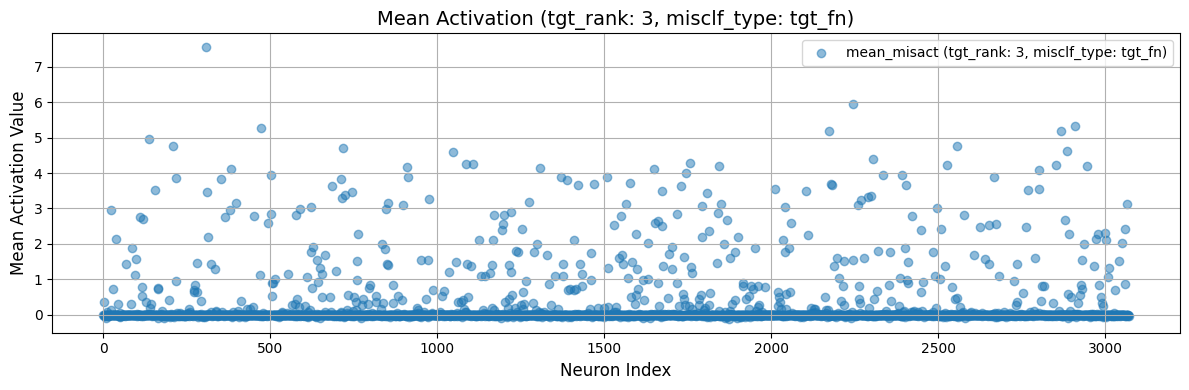

misclf_type: src_tgt, tgt_rank: 4, mean_misact_min: -0.13567939400672913, mean_misact_max: 7.266562461853027


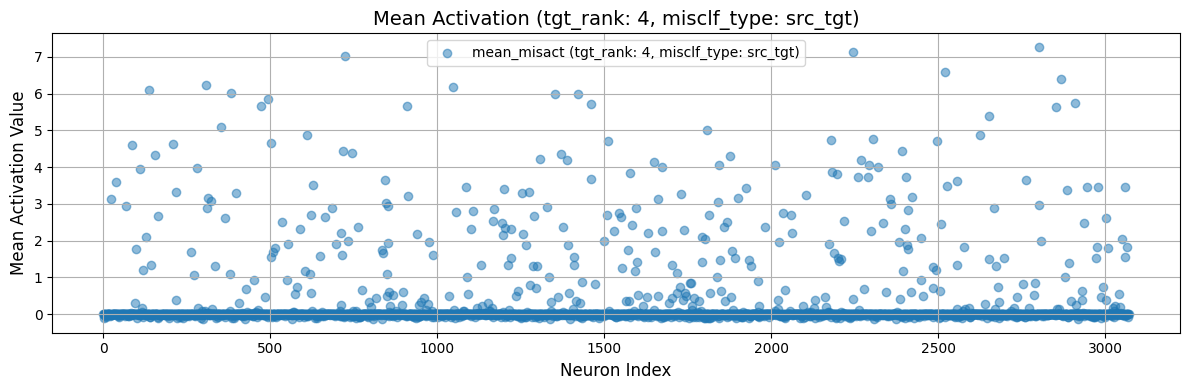

misclf_type: tgt, tgt_rank: 4, mean_misact_min: -0.10925129801034927, mean_misact_max: 6.413941383361816


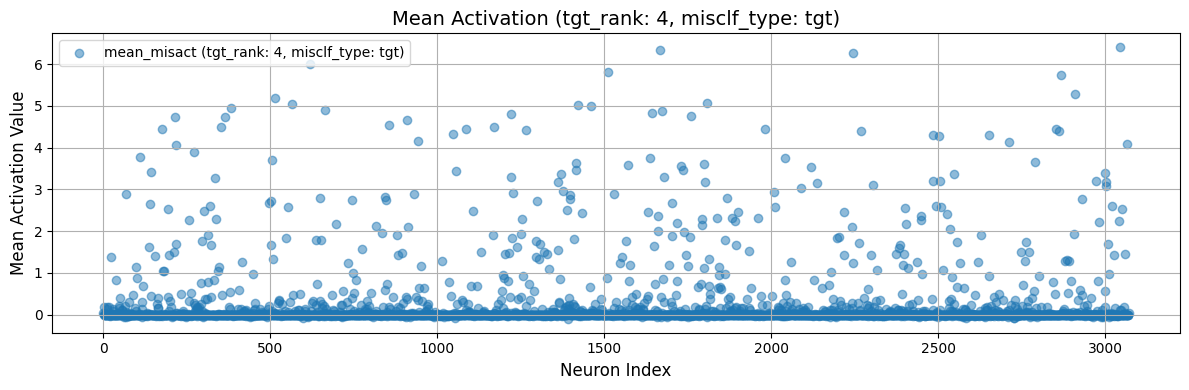

misclf_type: tgt_fp, tgt_rank: 4, mean_misact_min: -0.08762072026729584, mean_misact_max: 9.389054298400879


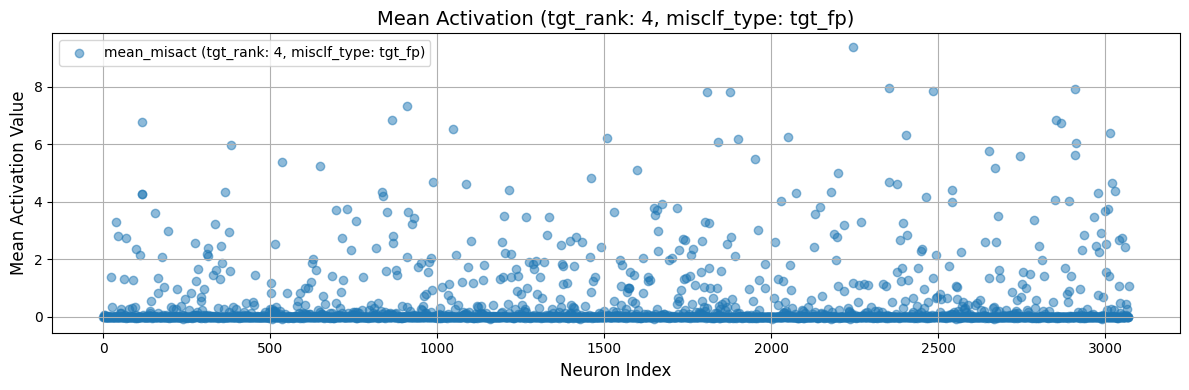

misclf_type: tgt_fn, tgt_rank: 4, mean_misact_min: -0.11099041998386383, mean_misact_max: 6.0606794357299805


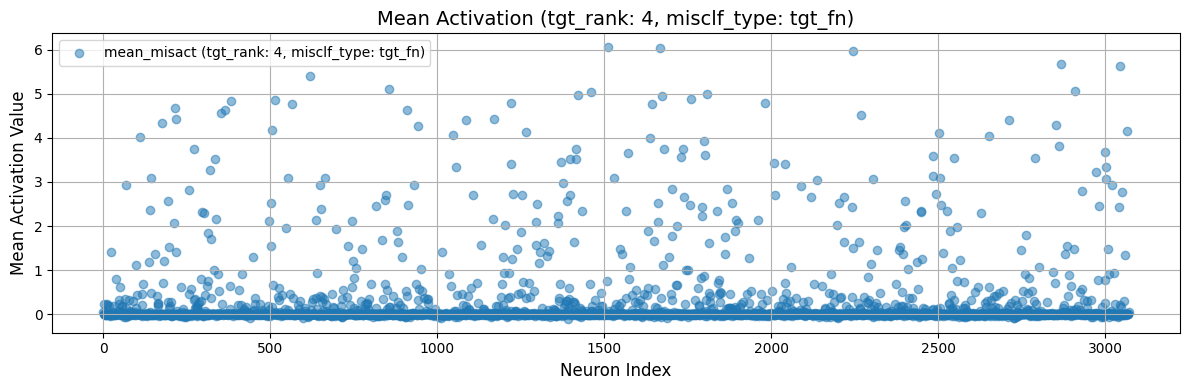

misclf_type: src_tgt, tgt_rank: 5, mean_misact_min: -0.11824476718902588, mean_misact_max: 7.152008533477783


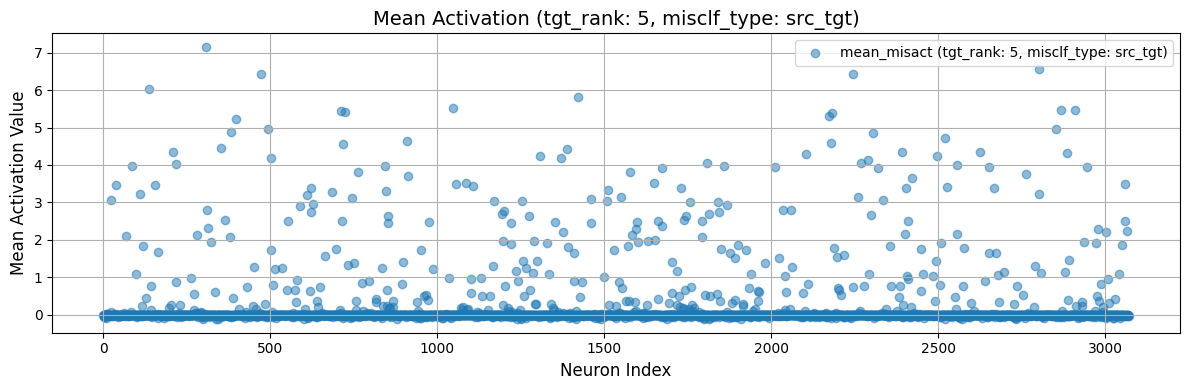

misclf_type: tgt, tgt_rank: 5, mean_misact_min: -0.09736289829015732, mean_misact_max: 9.103185653686523


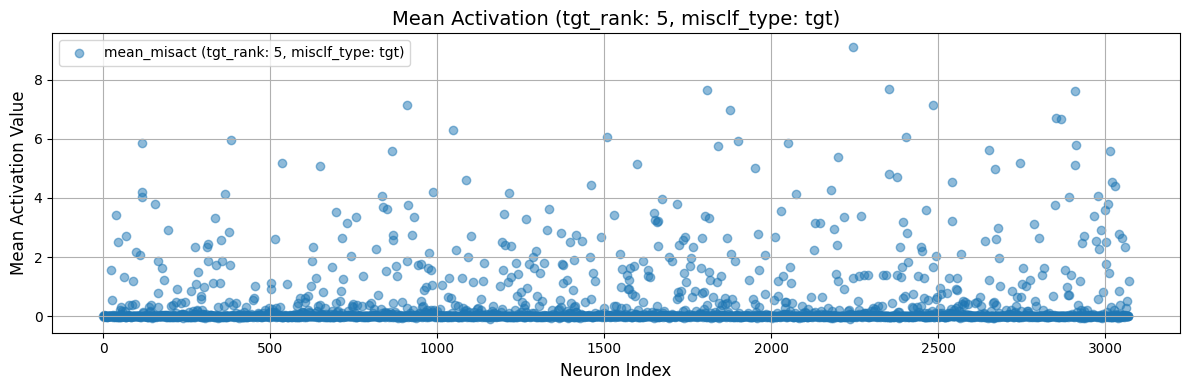

misclf_type: tgt_fp, tgt_rank: 5, mean_misact_min: -0.14658322930335999, mean_misact_max: 8.774571418762207


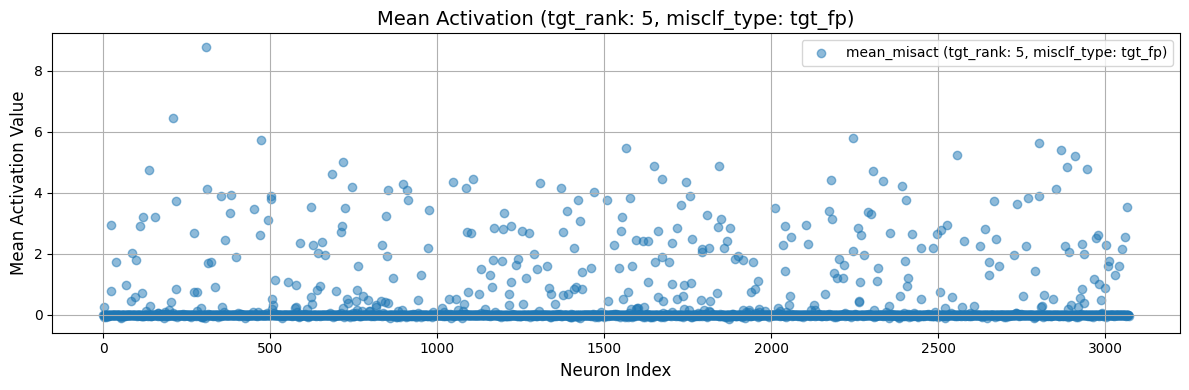

misclf_type: tgt_fn, tgt_rank: 5, mean_misact_min: -0.07306711375713348, mean_misact_max: 8.92692756652832


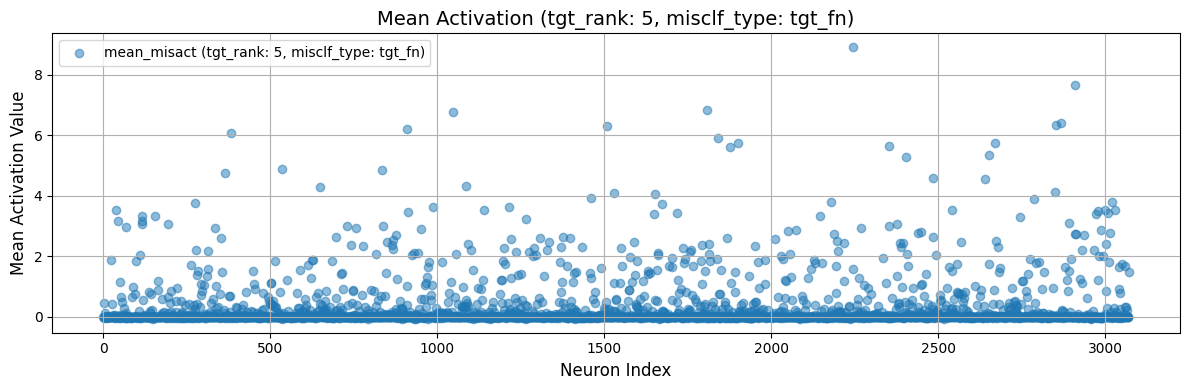

In [7]:
import torch
mid_cache_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "cache_states_repair")
mid_save_path = os.path.join(mid_cache_dir, f"intermediate_states_l11.pt")
cached_mid_states = torch.load(mid_save_path, map_location="cpu") # (tgt_splitのサンプル

# tgt_ranks = [1]
tgt_ranks = [1, 2, 3, 4, 5]
misclf_types = ["src_tgt", "tgt", "tgt_fp", "tgt_fn"]

misclf_info_dir = os.path.join(getattr(ViTExperiment, ds).OUTPUT_DIR.format(k=k), "misclf_info")

mean_misact_dict = {}

for i, tgt_rank in enumerate(tgt_ranks):
    for j, misclf_type in enumerate(misclf_types):
        if misclf_type == "tgt_fp" or misclf_type == "tgt_fn":
            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(misclf_info_dir, tgt_split="repair", misclf_type="tgt", tgt_rank=tgt_rank, fpfn=misclf_type.split("_")[1])
        else:
            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(misclf_info_dir, tgt_split="repair", misclf_type=misclf_type, tgt_rank=tgt_rank)
        tgt_states = cached_mid_states[tgt_mis_indices]
        mean_misact = tgt_states.mean(axis=0).to('cpu').detach().numpy()
        mean_misact_dict[(tgt_rank, misclf_type)] = mean_misact
        mean_misact_min = np.min(mean_misact)
        mean_misact_max = np.max(mean_misact)
        # plot
        print(f"=============================================\nmisclf_type: {misclf_type}, tgt_rank: {tgt_rank}, mean_misact_min: {mean_misact_min}, mean_misact_max: {mean_misact_max}\n============================================")
        plt.figure(figsize=(12, 4))
        plt.scatter(np.arange(len(mean_misact)), mean_misact, label=f"mean_misact (tgt_rank: {tgt_rank}, misclf_type: {misclf_type})", color="tab:blue", alpha=0.5)
        plt.title(f"Mean Activation (tgt_rank: {tgt_rank}, misclf_type: {misclf_type})", fontsize=14)
        plt.xlabel("Neuron Index", fontsize=12)
        plt.ylabel("Mean Activation Value", fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [36]:
def get_pareto_front(scaled_vdiff, scaled_mean_misact):
    """
    与えられた2軸の正規化済み配列（小さいほど良い）に対してパレートフロントのインデックスを返す。
    
    Parameters
    ----------
    scaled_vdiff : np.ndarray, shape (N,)
        修正の影響の大きさなど（小さいほど良い）
    scaled_mean_misact : np.ndarray, shape (N,)
        誤った活性化など（小さいほど良い）

    Returns
    -------
    pareto_indices : List[int]
        パレートフロントに属する点のインデックス
    """
    assert len(scaled_vdiff) == len(scaled_mean_misact)
    N = len(scaled_vdiff)
    pareto_indices = []

    for i in range(N):
        dominated = False
        for j in range(N):
            if j == i:
                continue
            if (scaled_vdiff[j] >= scaled_vdiff[i]) and (scaled_mean_misact[j] >= scaled_mean_misact[i]) \
               and ((scaled_vdiff[j] > scaled_vdiff[i]) or (scaled_mean_misact[j] > scaled_mean_misact[i])):
                dominated = True
                break
        if not dominated:
            pareto_indices.append(i)

    return pareto_indices


misclf_type: src_tgt, tgt_rank: 1, neuron_score_min: -3.5045075309897404, neuron_score_max: 510.0793688400454
pareto_ids_len: 3, pareto_ids: [1313, 1755, 1865]
correlation between scaled_vdiff and scaled_mean_misact: 0.5647921129786878



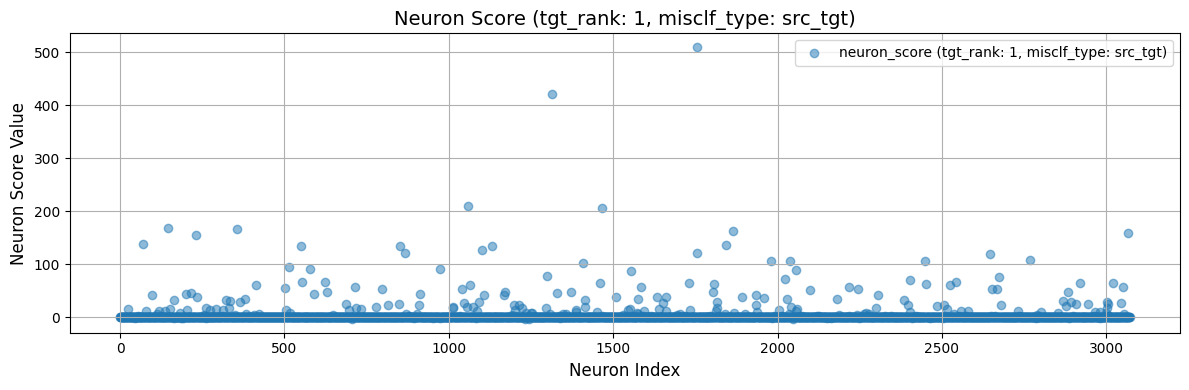

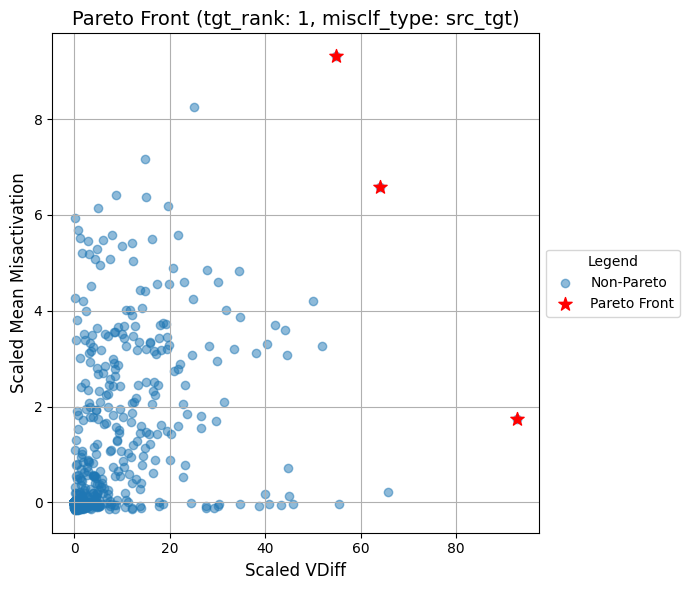


misclf_type: tgt, tgt_rank: 1, neuron_score_min: -3.2220985448630817, neuron_score_max: 1732.2144123290686
pareto_ids_len: 2, pareto_ids: [1755, 2039]
correlation between scaled_vdiff and scaled_mean_misact: 0.5552011274125465



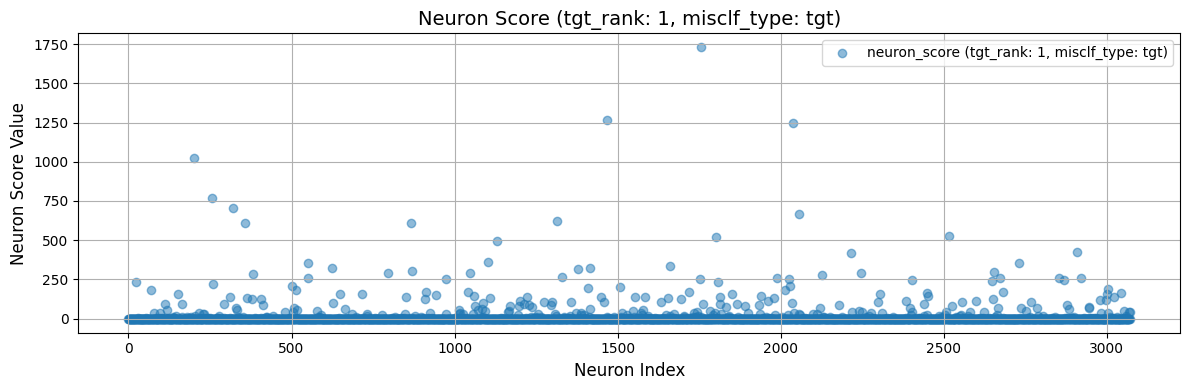

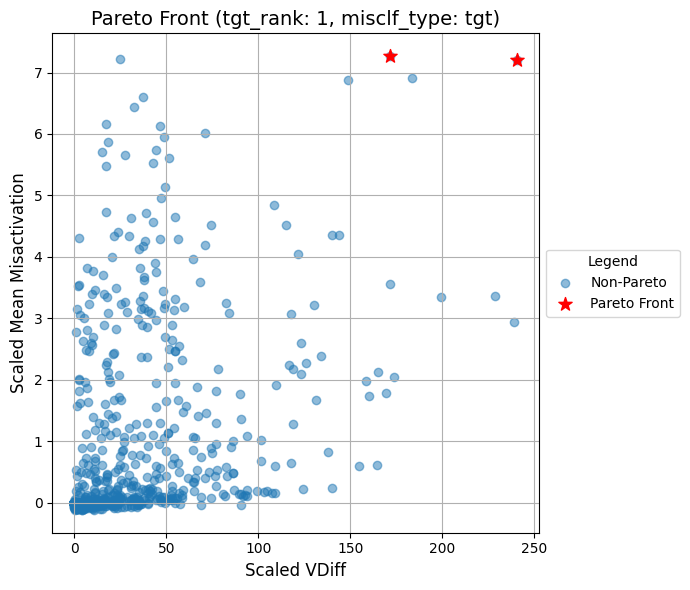


misclf_type: tgt_fp, tgt_rank: 1, neuron_score_min: -2.801761208333851, neuron_score_max: 1209.010775483088
pareto_ids_len: 3, pareto_ids: [513, 1466, 2039]
correlation between scaled_vdiff and scaled_mean_misact: 0.549275871572896



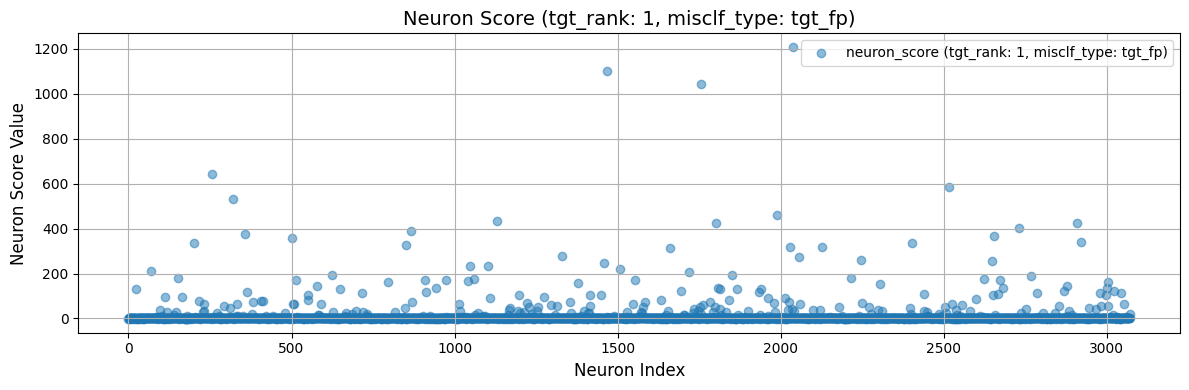

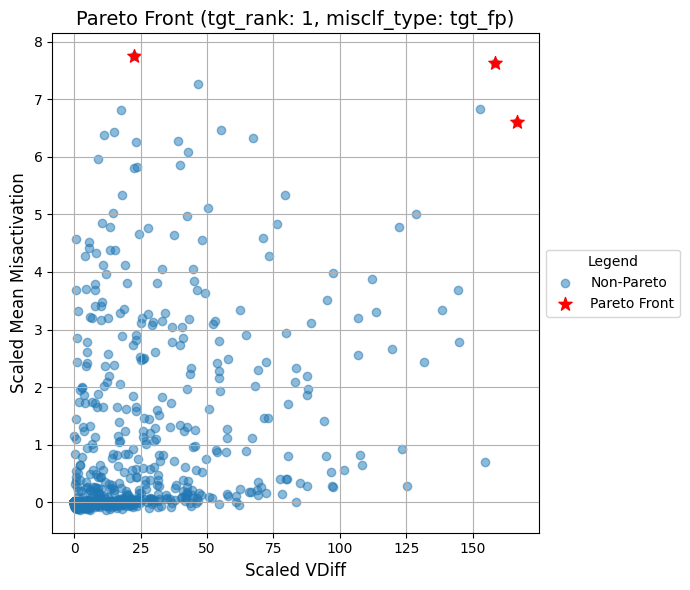


misclf_type: tgt_fn, tgt_rank: 1, neuron_score_min: -16.665173067903822, neuron_score_max: 2628.1360442604428
pareto_ids_len: 1, pareto_ids: [1755]
correlation between scaled_vdiff and scaled_mean_misact: 0.5220789964111905



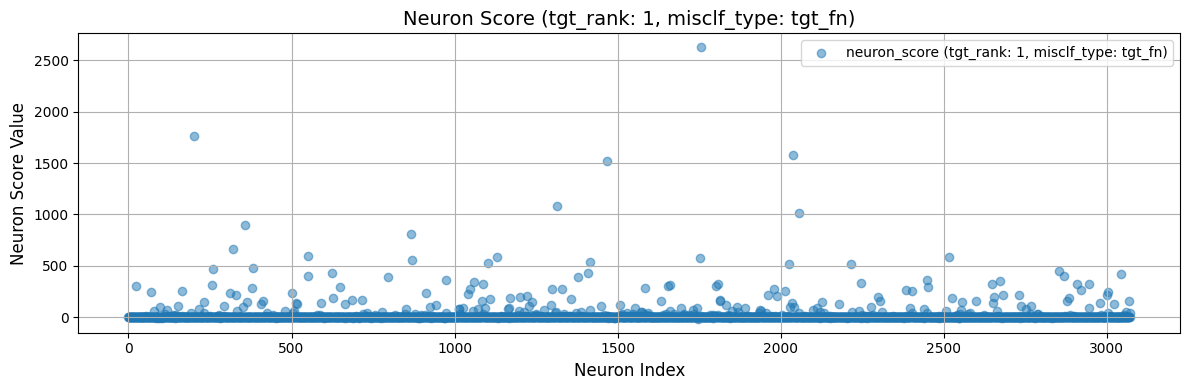

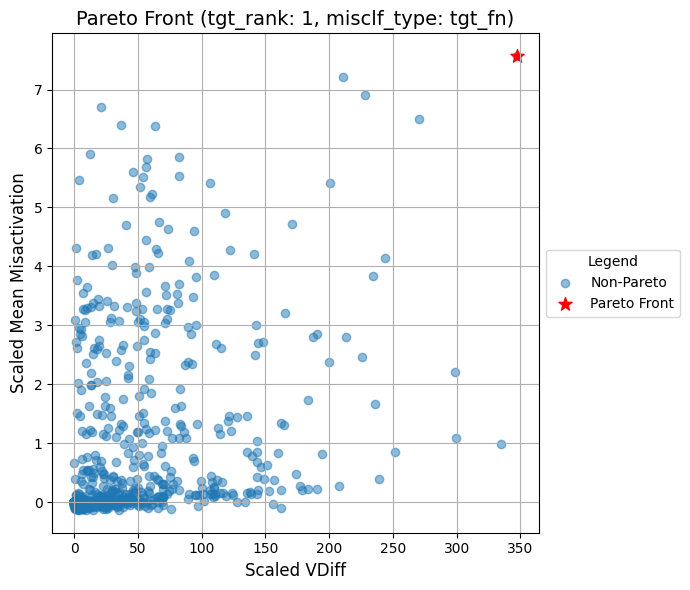


misclf_type: src_tgt, tgt_rank: 2, neuron_score_min: -3.419478335822836, neuron_score_max: 441.6771976046017
pareto_ids_len: 5, pareto_ids: [215, 320, 855, 1396, 1668]
correlation between scaled_vdiff and scaled_mean_misact: 0.46222125066481334



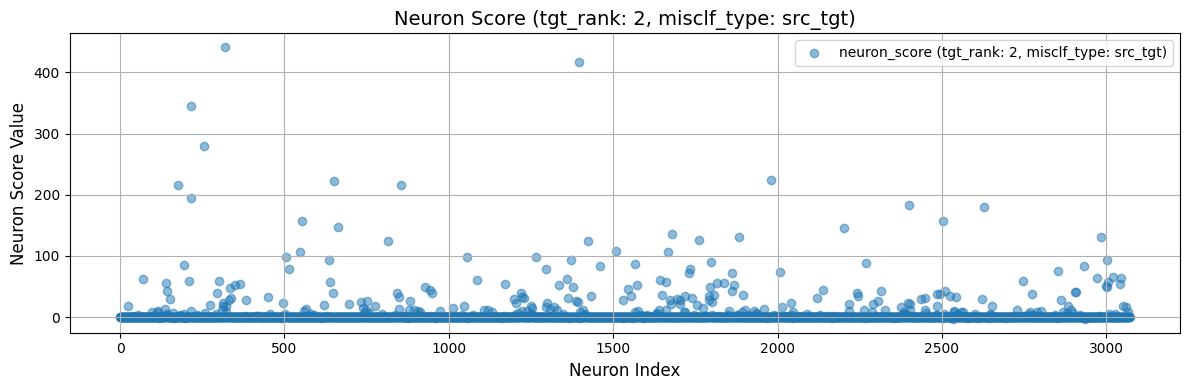

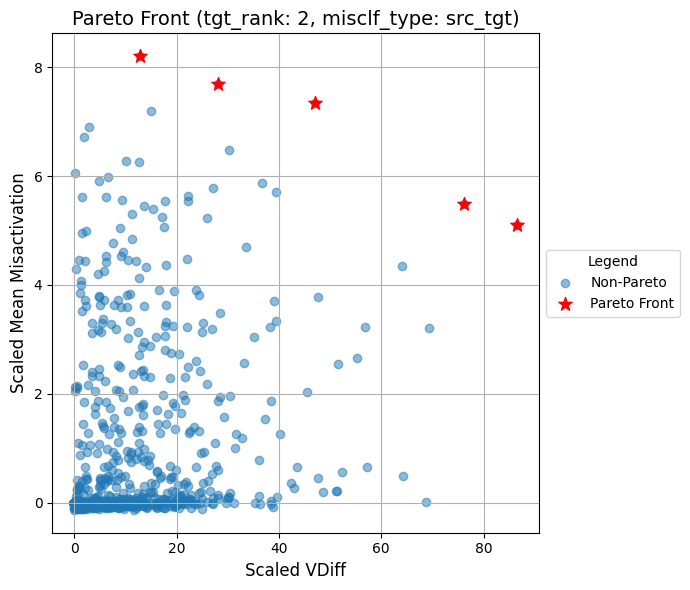


misclf_type: tgt, tgt_rank: 2, neuron_score_min: -2.5782016171094164, neuron_score_max: 2668.7589109574774
pareto_ids_len: 3, pareto_ids: [308, 2173, 2801]
correlation between scaled_vdiff and scaled_mean_misact: 0.6385256598851168



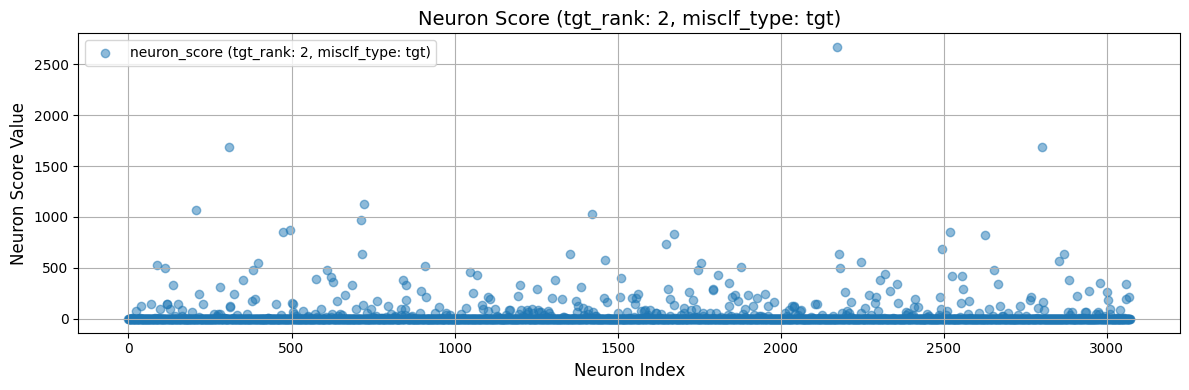

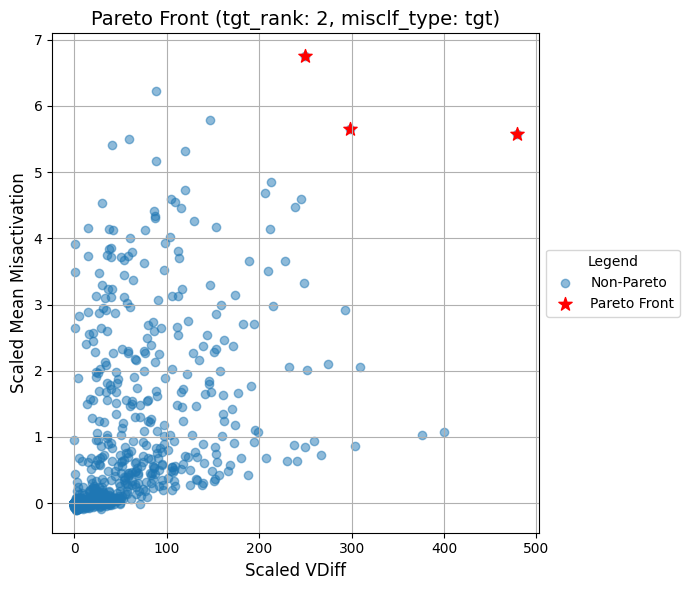


misclf_type: tgt_fp, tgt_rank: 2, neuron_score_min: -2.8696226808591074, neuron_score_max: 1018.7177515188628
pareto_ids_len: 2, pareto_ids: [308, 2173]
correlation between scaled_vdiff and scaled_mean_misact: 0.46330386830734177



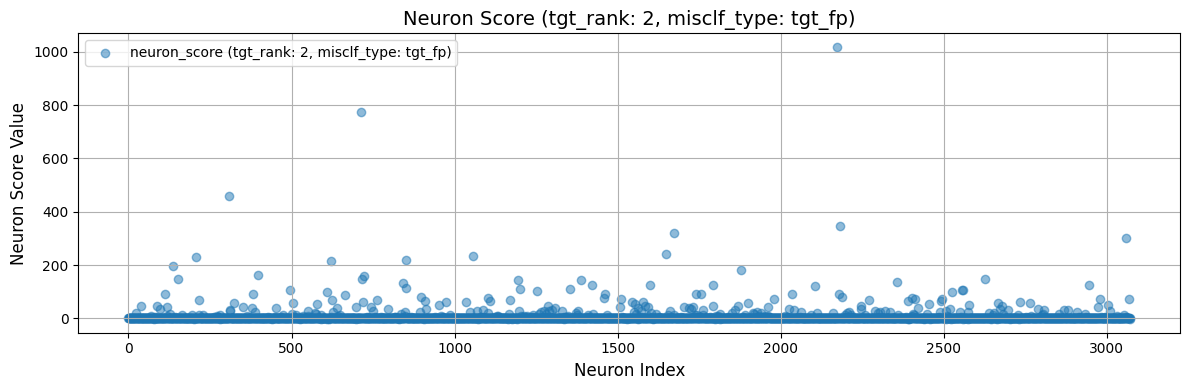

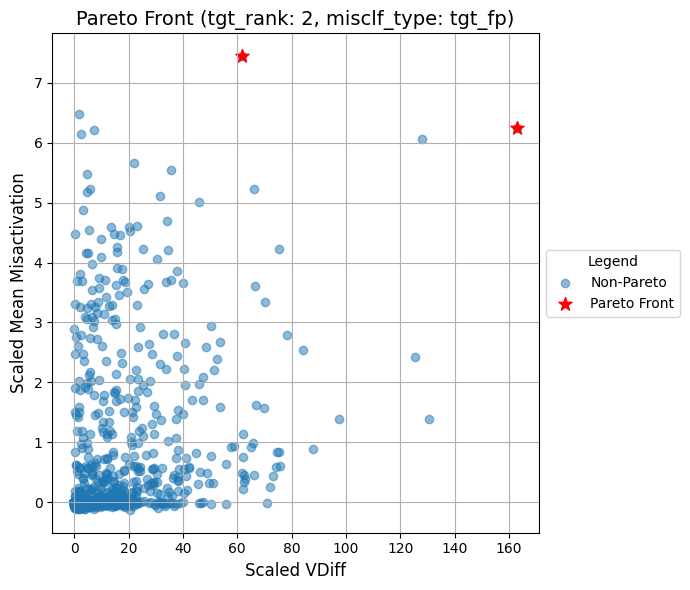


misclf_type: tgt_fn, tgt_rank: 2, neuron_score_min: -3.5000561545727504, neuron_score_max: 4118.3254496381805
pareto_ids_len: 4, pareto_ids: [308, 2173, 2245, 2801]
correlation between scaled_vdiff and scaled_mean_misact: 0.6883273061972655



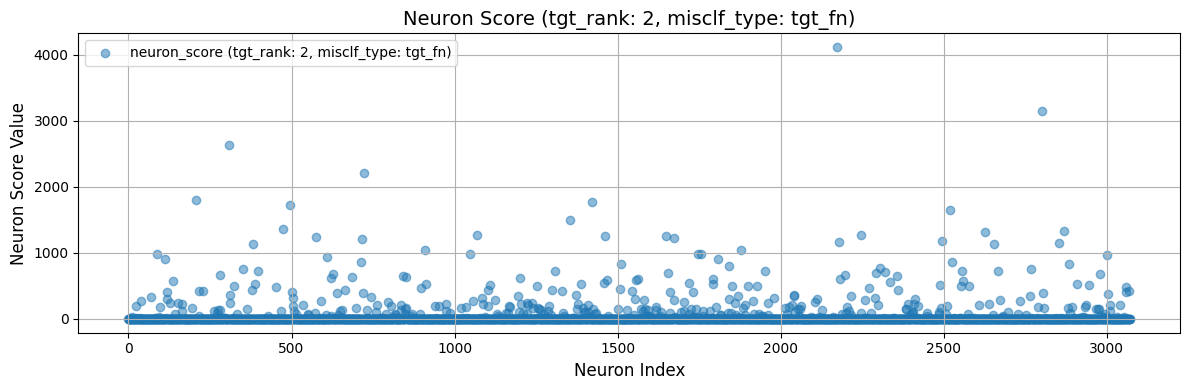

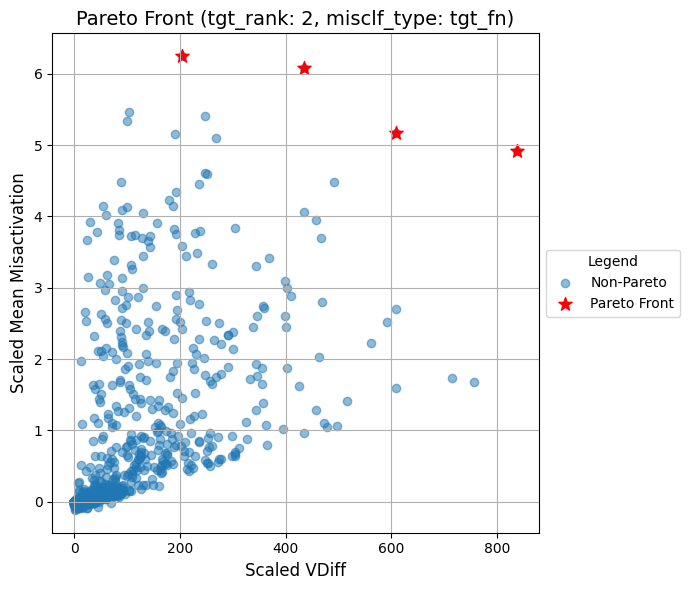


misclf_type: src_tgt, tgt_rank: 3, neuron_score_min: -3.139474718110046, neuron_score_max: 1459.861016363423
pareto_ids_len: 2, pareto_ids: [308, 2173]
correlation between scaled_vdiff and scaled_mean_misact: 0.4883908977970325



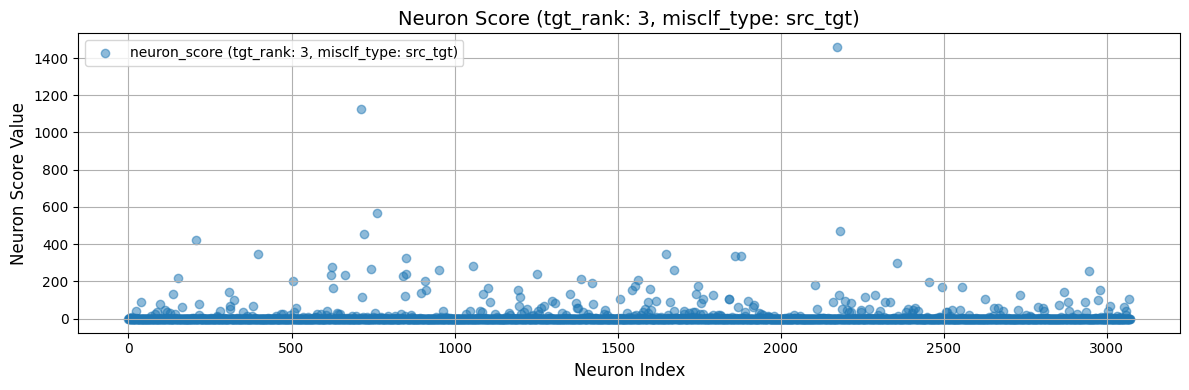

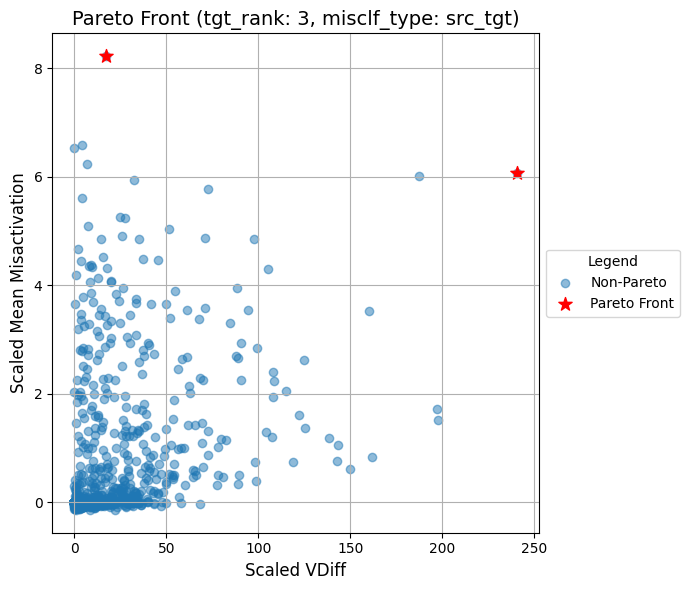


misclf_type: tgt, tgt_rank: 3, neuron_score_min: -2.3893359484806016, neuron_score_max: 1954.0493544633873
pareto_ids_len: 4, pareto_ids: [208, 308, 1468, 2801]
correlation between scaled_vdiff and scaled_mean_misact: 0.618537024085663



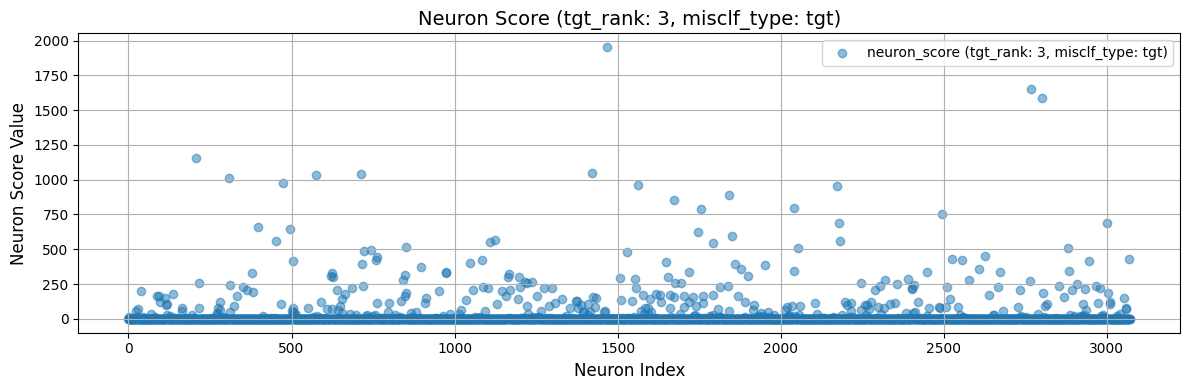

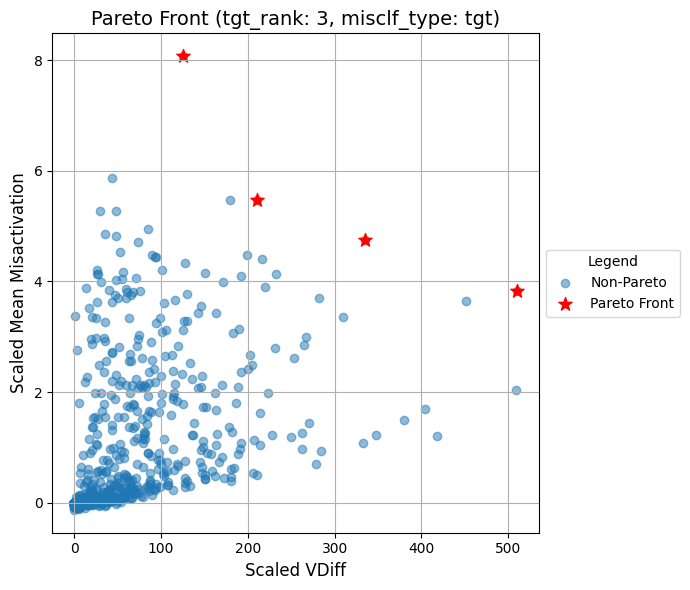


misclf_type: tgt_fp, tgt_rank: 3, neuron_score_min: -0.948680552159231, neuron_score_max: 300.17229717784704
pareto_ids_len: 5, pareto_ids: [147, 1466, 1755, 1865, 2999]
correlation between scaled_vdiff and scaled_mean_misact: 0.5725917938733537



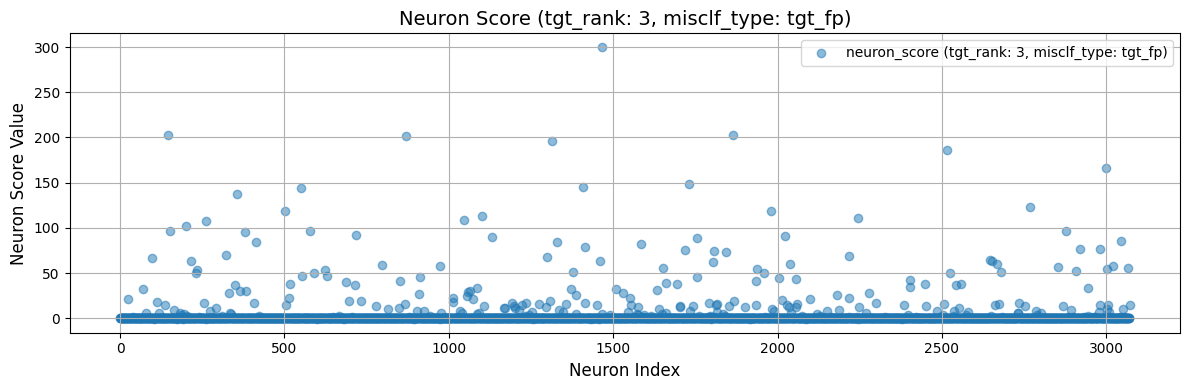

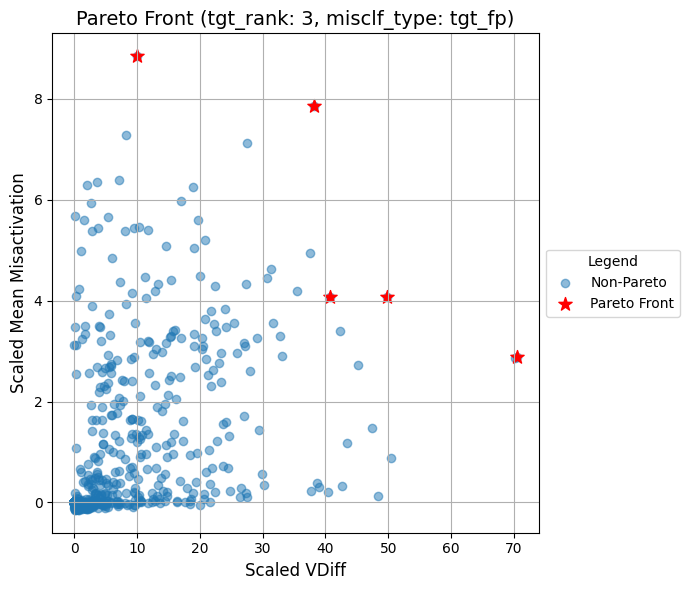


misclf_type: tgt_fn, tgt_rank: 3, neuron_score_min: -1.915535923084048, neuron_score_max: 3571.7367918026257
pareto_ids_len: 5, pareto_ids: [308, 473, 1468, 2173, 2801]
correlation between scaled_vdiff and scaled_mean_misact: 0.6696821054011258



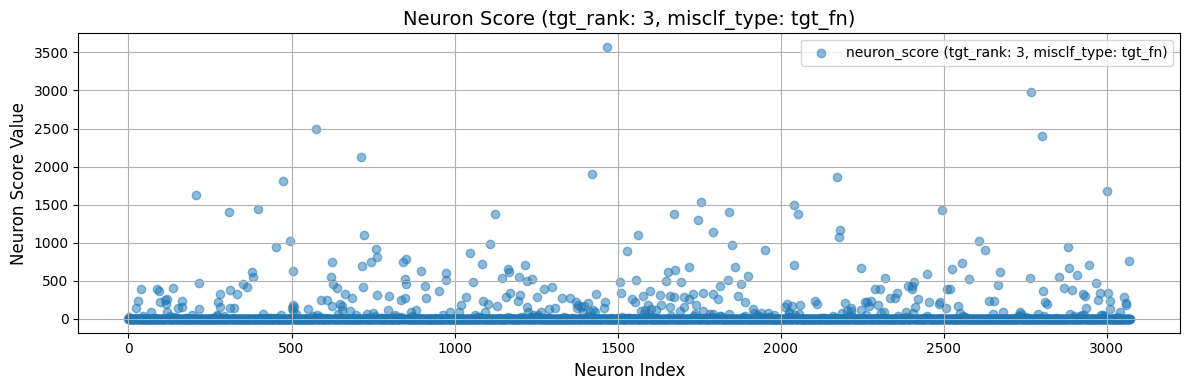

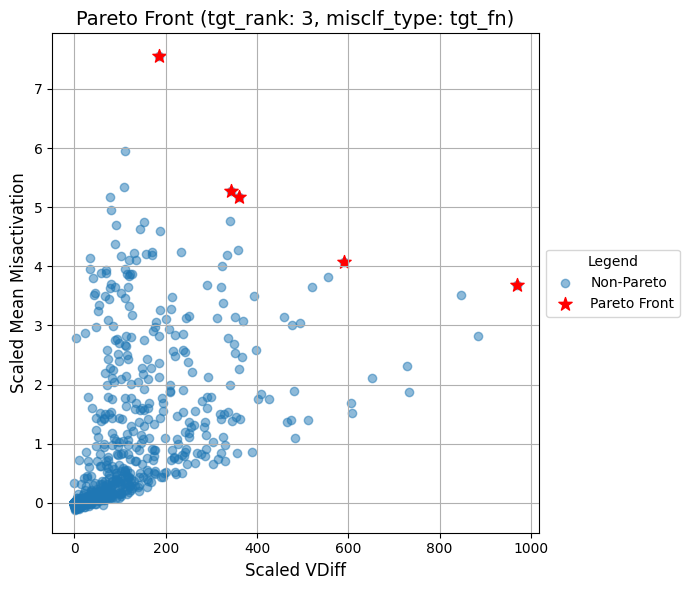


misclf_type: src_tgt, tgt_rank: 4, neuron_score_min: -4.411794751684425, neuron_score_max: 269.36412295397395
pareto_ids_len: 7, pareto_ids: [138, 494, 1088, 1170, 2182, 2801, 2853]
correlation between scaled_vdiff and scaled_mean_misact: 0.46274856131319975



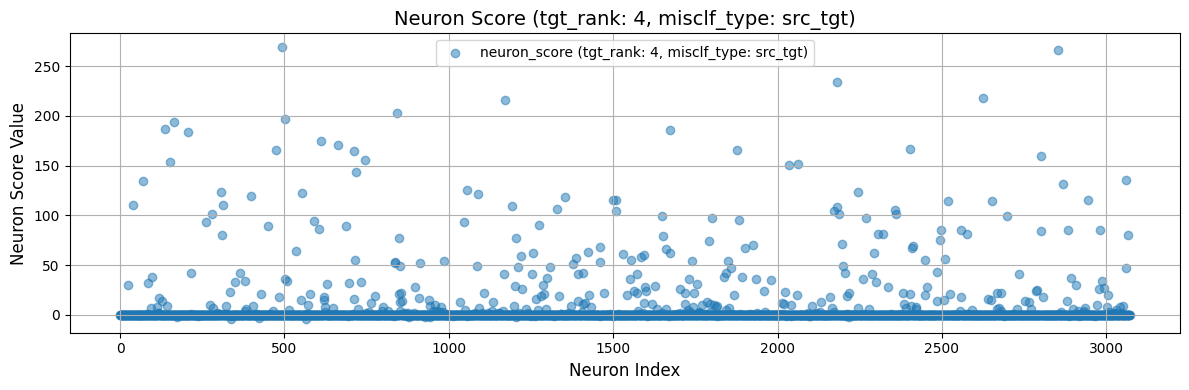

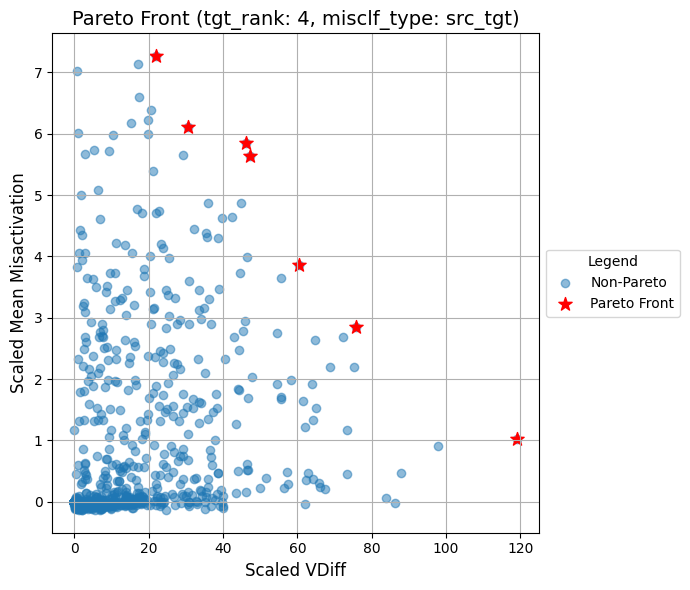


misclf_type: tgt, tgt_rank: 4, neuron_score_min: -2.9516059058989934, neuron_score_max: 3305.0949374765983
pareto_ids_len: 4, pareto_ids: [215, 855, 1668, 3044]
correlation between scaled_vdiff and scaled_mean_misact: 0.6566014443473357



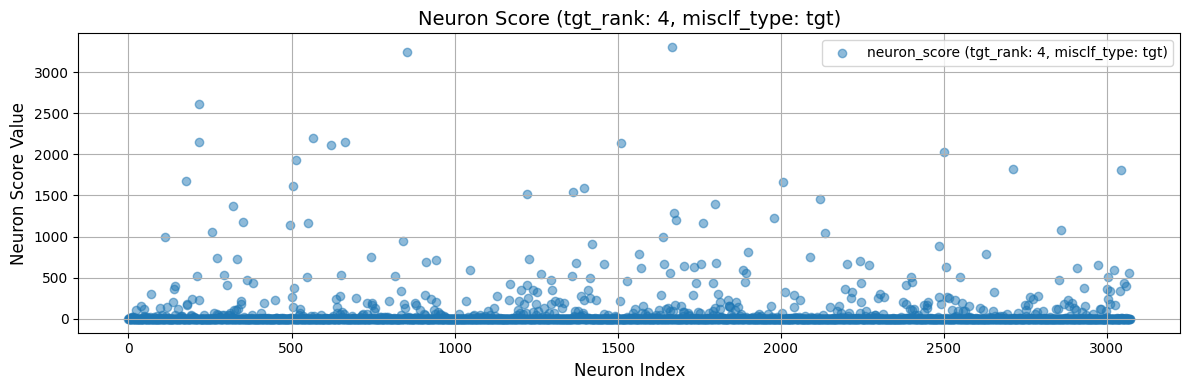

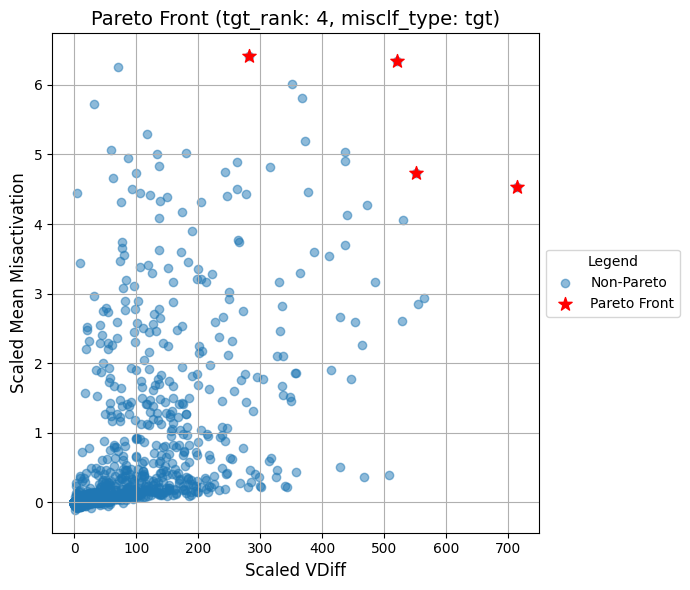


misclf_type: tgt_fp, tgt_rank: 4, neuron_score_min: -3.1766344103747857, neuron_score_max: 3909.3302024541617
pareto_ids_len: 3, pareto_ids: [1953, 2245, 2353]
correlation between scaled_vdiff and scaled_mean_misact: 0.6536546582664746



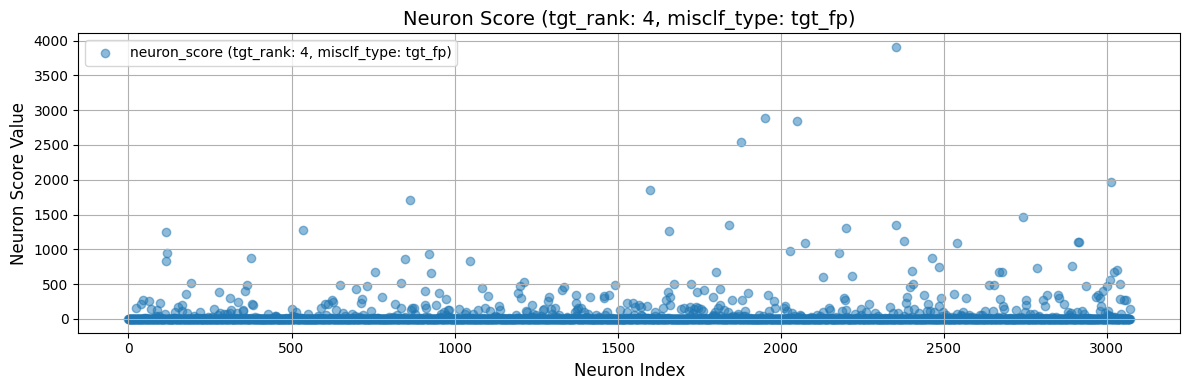

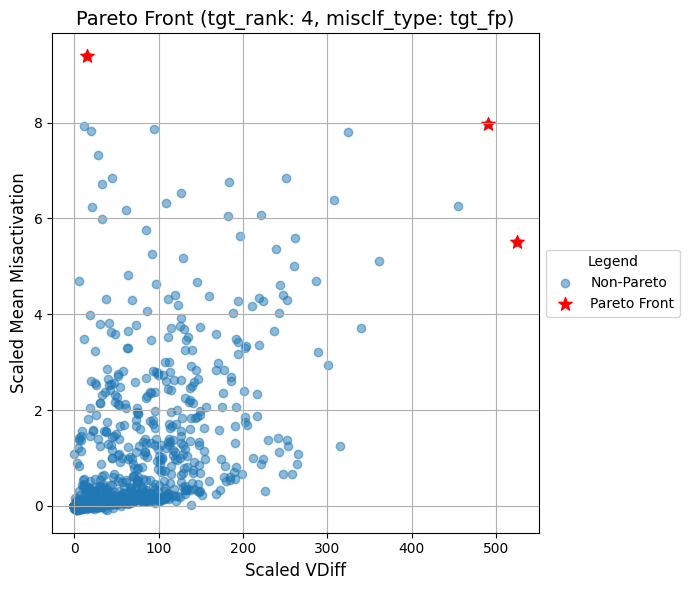


misclf_type: tgt_fn, tgt_rank: 4, neuron_score_min: -3.7482862231491296, neuron_score_max: 4956.4115402656
pareto_ids_len: 3, pareto_ids: [855, 1510, 1668]
correlation between scaled_vdiff and scaled_mean_misact: 0.6537122404540467



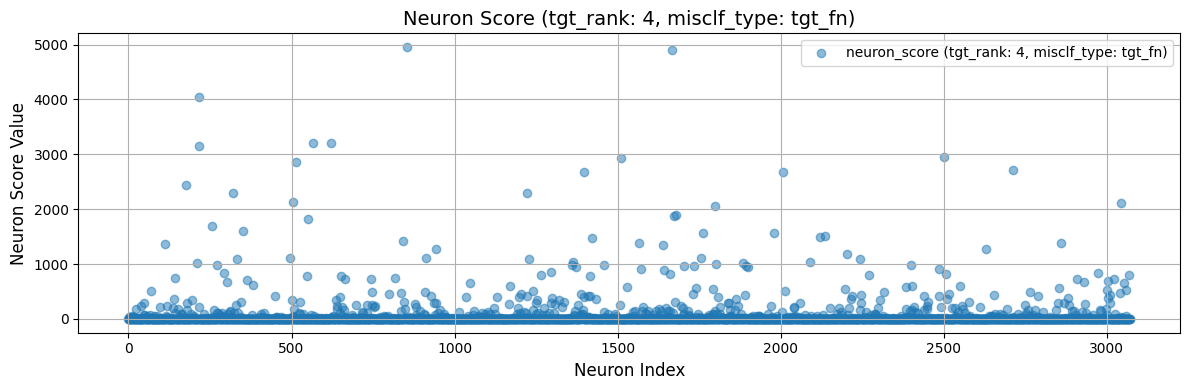

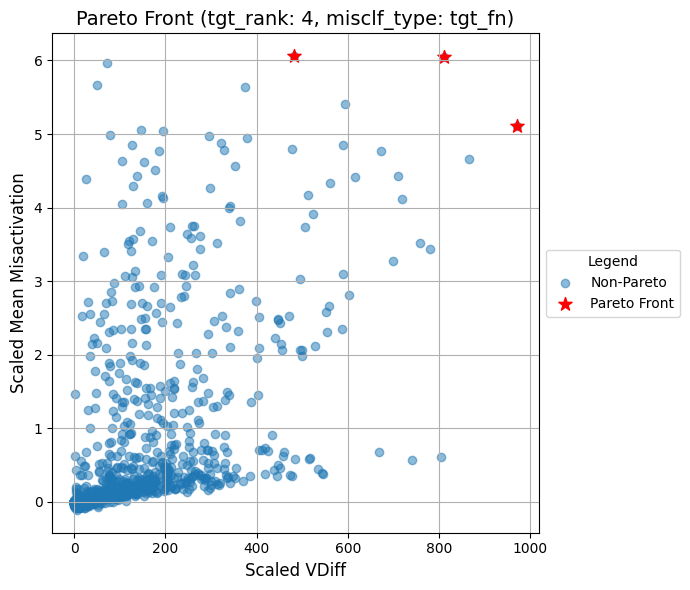


misclf_type: src_tgt, tgt_rank: 5, neuron_score_min: -3.972549312699594, neuron_score_max: 739.4766650876891
pareto_ids_len: 3, pareto_ids: [308, 1673, 3060]
correlation between scaled_vdiff and scaled_mean_misact: 0.502870934738354



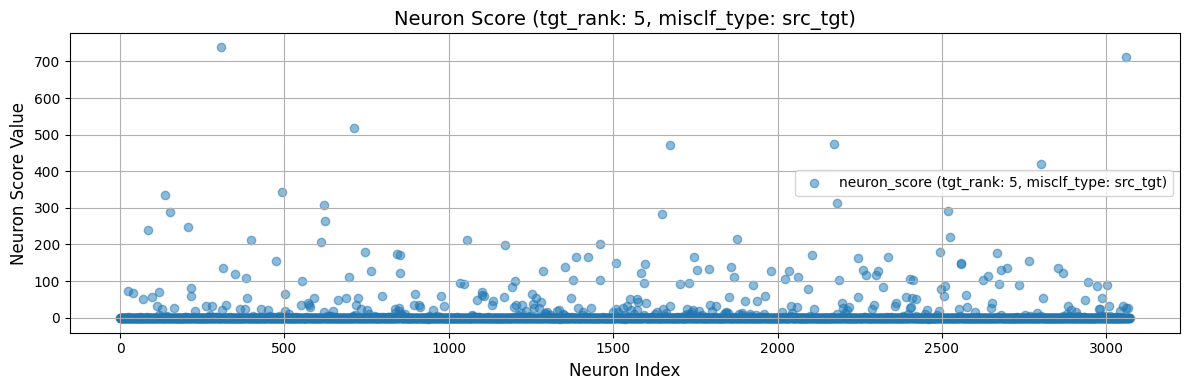

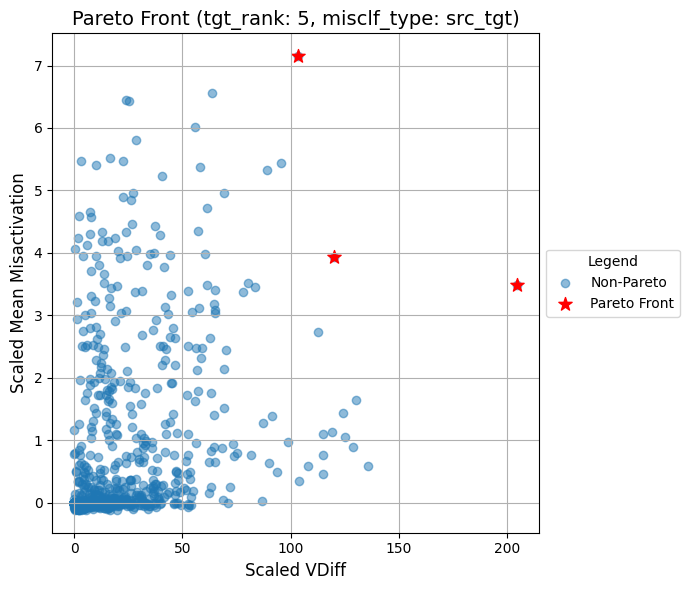


misclf_type: tgt, tgt_rank: 5, neuron_score_min: -0.9972542206065143, neuron_score_max: 3895.155267721446
pareto_ids_len: 3, pareto_ids: [2199, 2245, 2353]
correlation between scaled_vdiff and scaled_mean_misact: 0.668148266692002



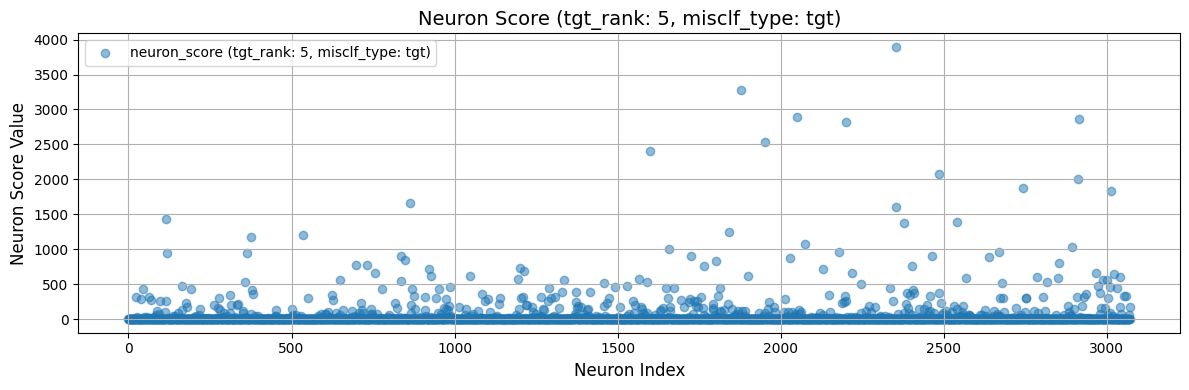

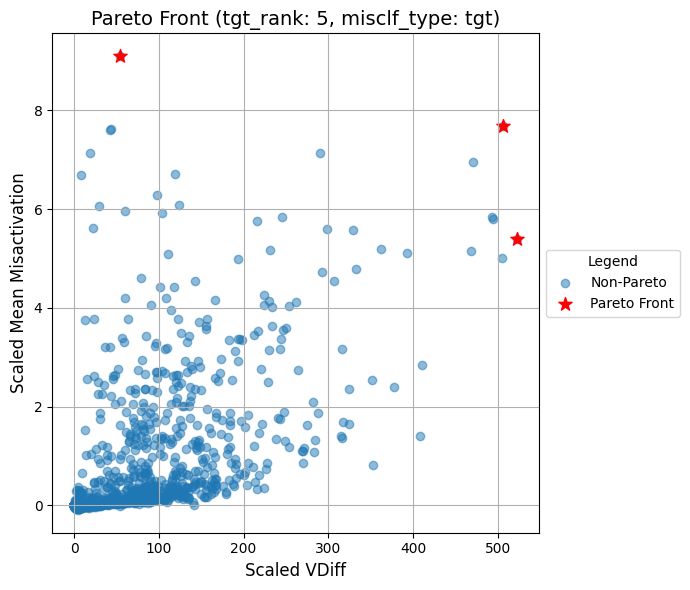


misclf_type: tgt_fp, tgt_rank: 5, neuron_score_min: -2.9890430748798122, neuron_score_max: 281.9981452195112
pareto_ids_len: 7, pareto_ids: [308, 723, 744, 762, 909, 1851, 2801]
correlation between scaled_vdiff and scaled_mean_misact: 0.49174941569469177



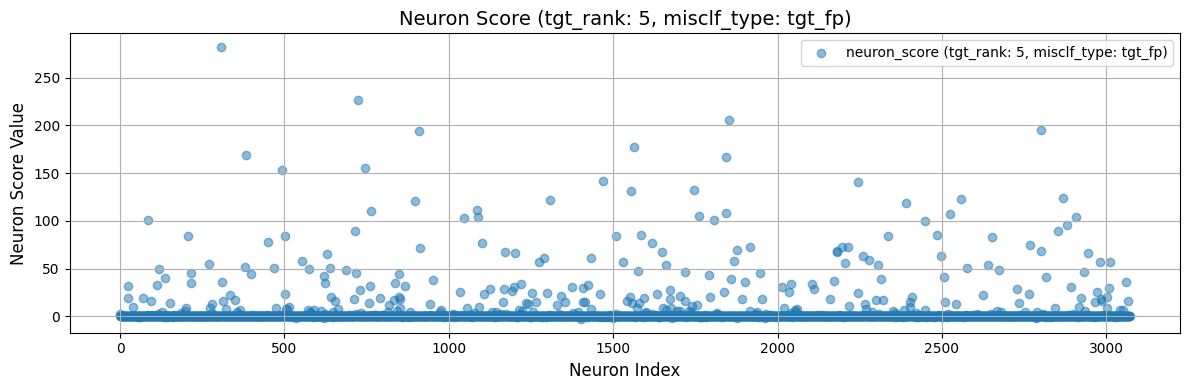

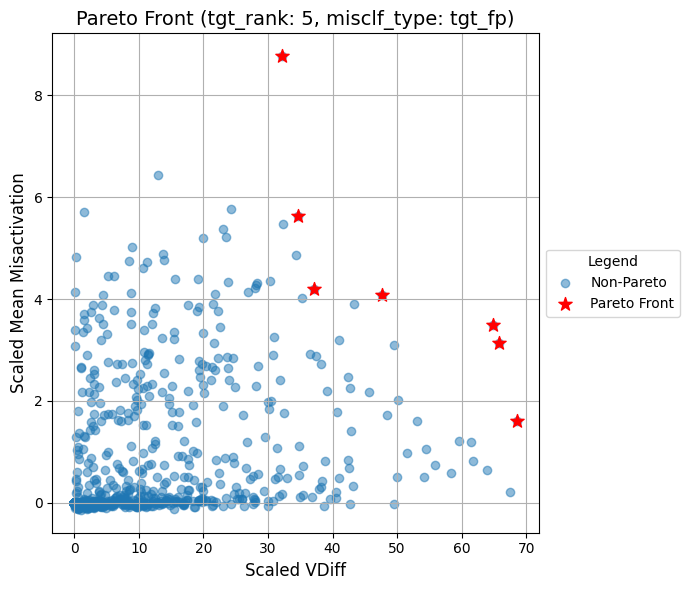


misclf_type: tgt_fn, tgt_rank: 5, neuron_score_min: -1.527739993787459, neuron_score_max: 5100.714728123677
pareto_ids_len: 6, pareto_ids: [1808, 1842, 1983, 2245, 2353, 2909]
correlation between scaled_vdiff and scaled_mean_misact: 0.6559902782041684



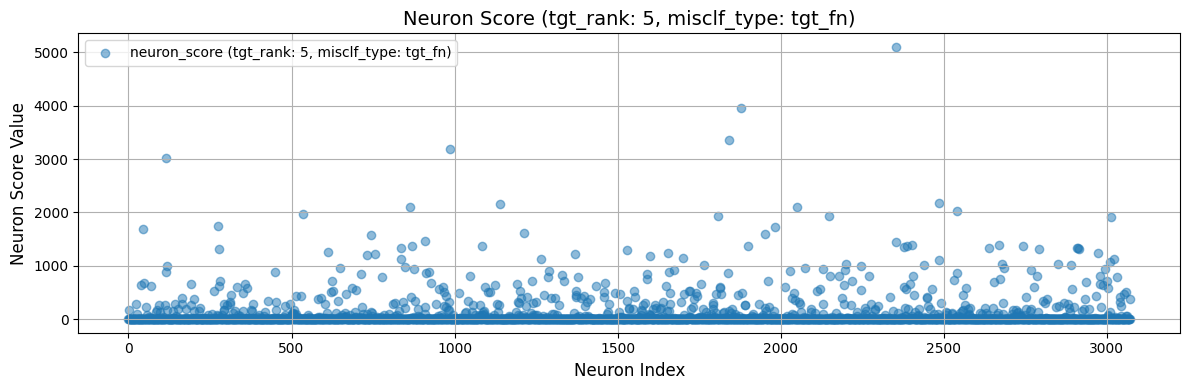

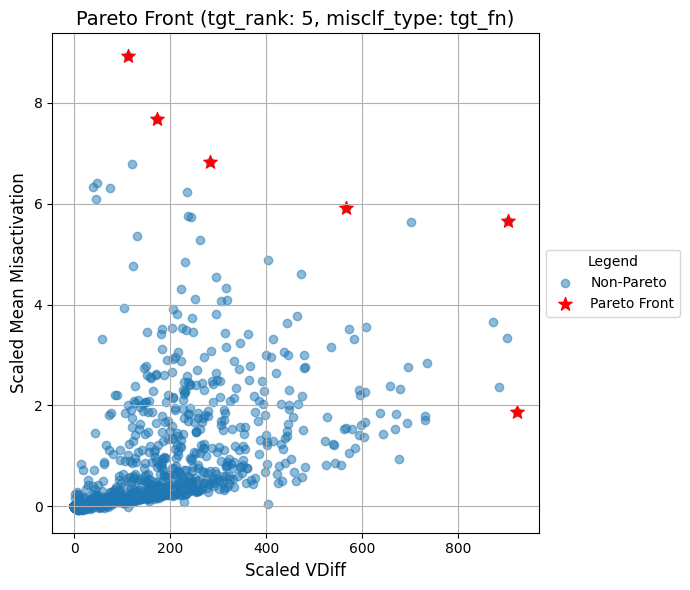

In [47]:
assert cor_dict.keys() == mis_dict.keys() == mean_misact_dict.keys()
scaled = False
for k in cor_dict.keys():
    vdiff = np.abs(cor_dict[k] - mis_dict[k])
    mean_misact = mean_misact_dict[k]
    if scaled:
        scaled_vdiff = (vdiff - np.min(vdiff)) / (np.max(vdiff) - np.min(vdiff))
        scaled_mean_misact = (mean_misact - np.min(mean_misact)) / (np.max(mean_misact) - np.min(mean_misact))
    else:
        scaled_vdiff = vdiff
        scaled_mean_misact = mean_misact
    pareto_ids = get_pareto_front(scaled_vdiff, scaled_mean_misact)
    neuron_score = scaled_vdiff * scaled_mean_misact
    neuron_score_min = np.min(neuron_score)
    neuron_score_max = np.max(neuron_score)
    # scaled_vdiff, scaled_mean_misactの相関係数もチェック
    corr = np.corrcoef(scaled_vdiff, scaled_mean_misact)[0, 1]
    print("\n=============================================")
    print(f"misclf_type: {k[1]}, tgt_rank: {k[0]}, neuron_score_min: {neuron_score_min}, neuron_score_max: {neuron_score_max}")
    print(f"pareto_ids_len: {len(pareto_ids)}, pareto_ids: {pareto_ids}")
    print(f"correlation between scaled_vdiff and scaled_mean_misact: {corr}")
    print("=============================================\n")
    # neuron scoreのプロット
    plt.figure(figsize=(12, 4))
    plt.scatter(np.arange(len(neuron_score)), neuron_score, label=f"neuron_score (tgt_rank: {k[0]}, misclf_type: {k[1]})", color="tab:blue", alpha=0.5)
    plt.title(f"Neuron Score (tgt_rank: {k[0]}, misclf_type: {k[1]})", fontsize=14)
    plt.xlabel("Neuron Index", fontsize=12)
    plt.ylabel("Neuron Score Value", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # scaled_vdiff x scaled_mean_misactのプロット (pareto_frontが赤色)
    plt.figure(figsize=(7, 6))
    plt.scatter(scaled_vdiff, scaled_mean_misact, color="tab:blue", alpha=0.5, label="Non-Pareto")
    plt.scatter(scaled_vdiff[pareto_ids], scaled_mean_misact[pareto_ids], color="red", marker="*", s=100, label="Pareto Front")
    plt.xlabel("Scaled VDiff", fontsize=12)
    plt.ylabel("Scaled Mean Misactivation", fontsize=12)
    plt.title(f"Pareto Front (tgt_rank: {k[0]}, misclf_type: {k[1]})", fontsize=14)
    plt.legend(
    loc="center left", bbox_to_anchor=(1, 0.5), title="Legend"
    )
    plt.grid(True)
    plt.tight_layout()
    plt.show()
